# Damaris Campos- Project 1

## **<mark>Top 3 Best Problems</mark>**

## **Top 1 (Complex - Northwinds2022TSQLV7)**

<u>Proposition:</u>

- Return a query that calculates the total sales for each product category and determines the fiscal quarter based on the order date. The fiscal quarter is defined from May to April, categorized as QTR I (May to July), QTR II (August to October), QTR III (November to January), and QTR IV (February to April). The query orders the results by total sales (TotalSales) in descending order.
- Tables involved: Sales.\[order\], Sales.OrderDetail, Production.product, Production.category

*Written in collaboration with ChatGPT from OpenAI to improve understanding and assist with the explanation of the query*

<u>Standard View:</u>

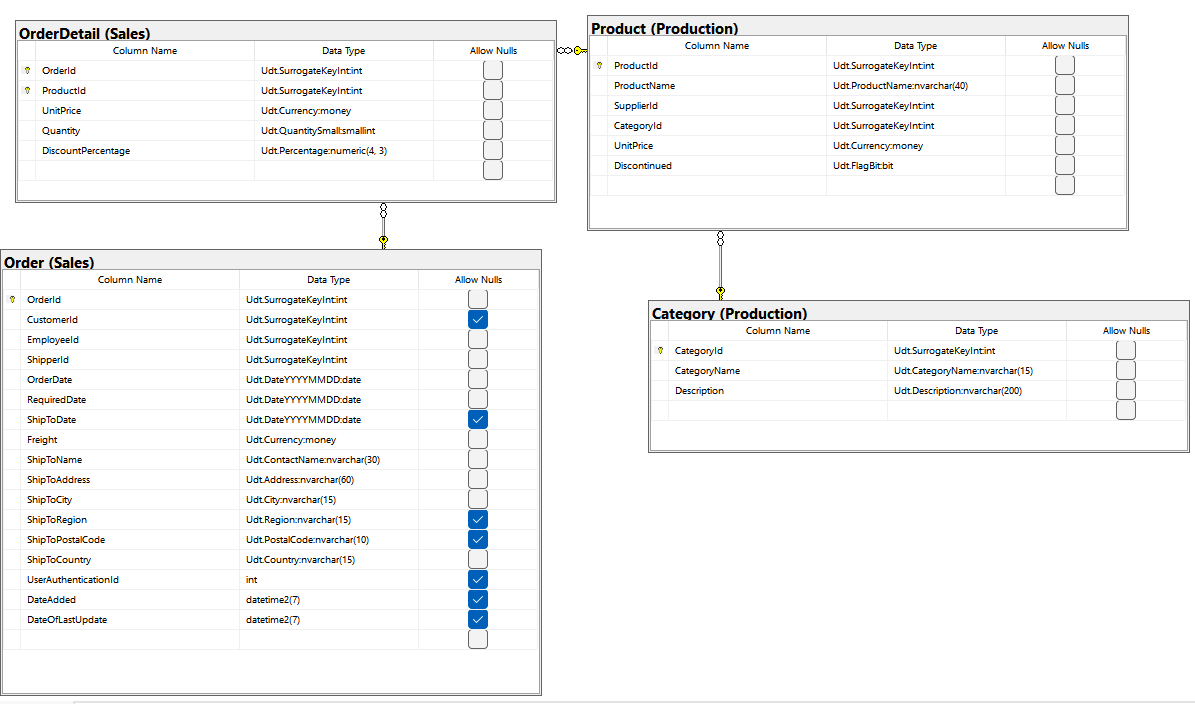

<u>Key View:</u>

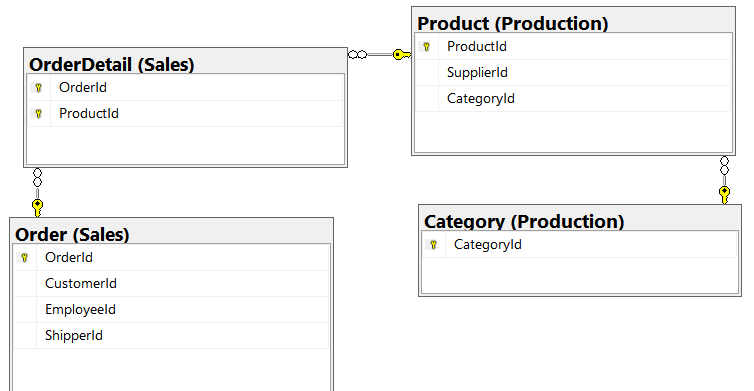

<u>Columns:</u>
| Table Names         | Columns Selected     |
|---------------------|----------------------|
| Sales.Order         | OrderDate            |
| Sales.OrderDetail   | UnitPrice            |
| Production.Product  | CategoryID, ProductID |
| Production.Category | CategoryID, CategoryName |



In [4]:
USE Northwinds2022TSQLV7;
GO

DROP FUNCTION IF EXISTS dbo.SalesFiscalQuarter;
GO

CREATE FUNCTION dbo.SalesFiscalQuarter(@OrderDate DATE)
RETURNS NVARCHAR(20)
AS
BEGIN
    DECLARE @Result NVARCHAR(20), @FiscalQuarter NVARCHAR(20);

    SET @FiscalQuarter = CASE
                            WHEN MONTH(@OrderDate) BETWEEN 5 AND 7 THEN 'QTR I'
                            WHEN MONTH(@OrderDate) BETWEEN 8 AND 10 THEN 'QTR II'
                            WHEN MONTH(@OrderDate) BETWEEN 11 AND 12 THEN 'QTR III'
                            WHEN MONTH(@OrderDate) BETWEEN 1 AND 4 THEN 'QTR IV'
                            ELSE 'UNKNOWN QTR'
                        END;

    SET @Result = CONCAT('FY', YEAR(@OrderDate) + CASE WHEN MONTH(@OrderDate) BETWEEN 5 AND 12 THEN 1 ELSE 0 END, '-', @FiscalQuarter);

    RETURN @Result;
END;
GO


WITH ProductQuarter AS (
    SELECT 
        so.OrderDate, 
        SUM(sod.UnitPrice) AS TotalSales, 
        pc.CategoryName, 
        dbo.SalesFiscalQuarter(so.OrderDate) AS FiscalQuarter
    FROM 
        Sales.[Order] AS so
    INNER JOIN 
        Sales.OrderDetail AS sod ON so.OrderID = sod.OrderID
    INNER JOIN 
        Production.Product AS pp ON sod.ProductID = pp.ProductID
    INNER JOIN 
        Production.Category AS pc ON pp.CategoryID = pc.CategoryID
    GROUP BY 
        so.OrderDate, 
        pc.CategoryName
)

SELECT 
    OrderDate, 
    TotalSales, 
    FiscalQuarter, 
    CategoryName
FROM 
    ProductQuarter
WHERE 
    CategoryName = N'Meat/Poultry'
    AND YEAR(OrderDate) = '2016'
ORDER BY 
    TotalSales DESC;
--FOR JSON PATH, ROOT('Complex'), INCLUDE_NULL_VALUES;

DROP FUNCTION IF EXISTS dbo.SalesFiscalQuarter;
GO


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(33 rows affected)

Total execution time: 00:00:00.034

OrderDate,TotalSales,FiscalQuarter,CategoryName
2016-02-26,162.79,FY2016-QTR IV,Meat/Poultry
2016-03-24,162.79,FY2016-QTR IV,Meat/Poultry
2016-04-17,156.59,FY2016-QTR IV,Meat/Poultry
2016-01-15,156.59,FY2016-QTR IV,Meat/Poultry
2016-04-01,147.79,FY2016-QTR IV,Meat/Poultry
2016-04-07,123.79,FY2016-QTR IV,Meat/Poultry
2016-04-08,123.79,FY2016-QTR IV,Meat/Poultry
2016-01-28,123.79,FY2016-QTR IV,Meat/Poultry
2016-02-18,123.79,FY2016-QTR IV,Meat/Poultry
2016-02-19,123.79,FY2016-QTR IV,Meat/Poultry


## **Top 2 (Medium - AdventureWorksDW2017**

<u>Proposition:</u>

- Retrieve customer demographic information, categorize customers into age groups, and include their country region name.
- Tables involved: DimCustomer, DimGeography

_Written in collaboration with ChatGPT from OpenAI to improve understanding and assist with the explanation of the query_

<u>Standard View:</u>

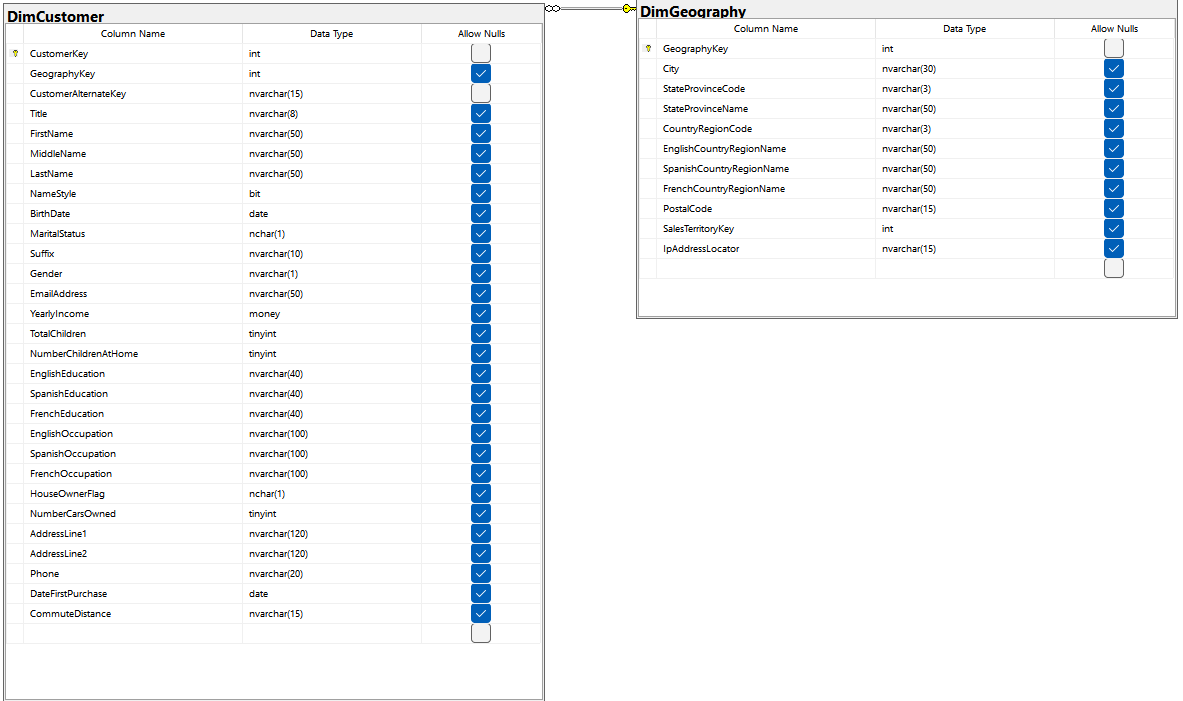

<u>Key View:</u>

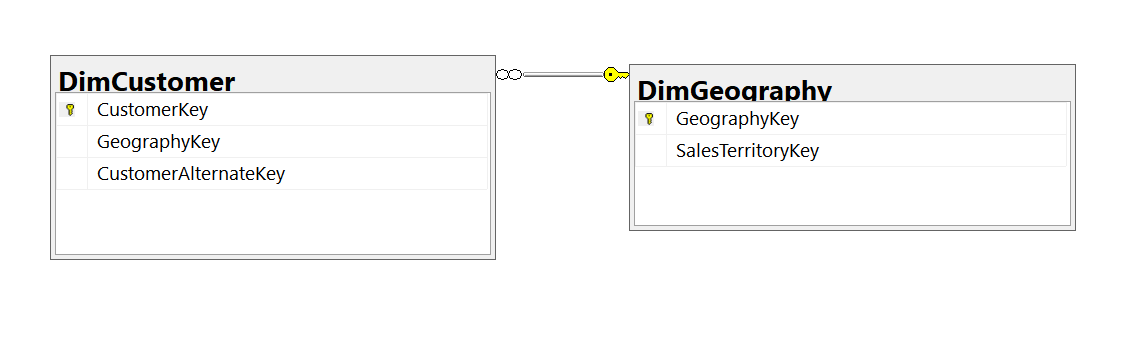

<u>Columns:</u>

| Table Names | Columns Selected |
| --- | --- |
| dbo.DimCustomer | CustomerKey,<br>FirstName,<br>LastName,<br>EnglishEducation,<br>NumberCarsOwned,<br>TotalChildren,<br>BirthDate,<br>EnglishOccupation,<br>YearlyIncome,<br>GeographyKey |
| dbo.DimGeography | GeographyKey, EnglishCountryRegionName |

Order By:

| Table Name | Column Name | Sort Order |
| --- | --- | --- |
| dbo.DimCustomer | EnglishEducation | ASC |

In [1]:
USE AdventureWorksDW2017;
GO

-- Common Table Expression (CTE) with inner join
WITH CustomerAgeCategory AS (
    SELECT 
        c.CustomerKey,
        CONCAT(c.FirstName, ' ', c.LastName) AS FullName,
        c.EnglishEducation,
        c.NumberCarsOwned,
        c.TotalChildren,
        c.BirthDate,
        c.EnglishOccupation,
        c.YearlyIncome,
        CASE
            WHEN DATEDIFF(YEAR, c.BirthDate, GETDATE()) BETWEEN 51 AND 60 THEN '51-60'
            ELSE NULL
        END AS AgeCategory,
        dg.EnglishCountryRegionName -- Selecting EnglishCountryRegionName from DimGeography
    FROM 
        dbo.DimCustomer AS c
    INNER JOIN
        dbo.DimGeography AS dg ON c.GeographyKey = dg.GeographyKey -- Inner join with DimGeography
    WHERE 
        dg.EnglishCountryRegionName = 'Germany' 
        AND c.YearlyIncome > 60000
        AND c.EnglishEducation IN ('Partial High School', 'Bachelors')

)

-- Main query
SELECT 
    FullName,
    EnglishEducation AS Education,
    EnglishOccupation AS Occupation,
    YearlyIncome,
    AgeCategory AS Age,
    TotalChildren,
    NumberCarsOwned AS CarsOwned,
    EnglishCountryRegionName AS Country -- Including EnglishCountryRegionName in the result set
FROM 
    CustomerAgeCategory
WHERE 
    AgeCategory = '51-60'
ORDER BY 
    EnglishEducation
GO


Commands completed successfully.

(17 rows affected)

Total execution time: 00:00:00.062

FullName,Education,Occupation,YearlyIncome,Age,TotalChildren,CarsOwned,Country
Clarence Anand,Bachelors,Management,130000.00,51-60,2,4,Germany
Cara Lu,Bachelors,Management,130000.00,51-60,2,4,Germany
Raymond Martinez,Bachelors,Management,130000.00,51-60,2,4,Germany
Mary Carter,Bachelors,Management,130000.00,51-60,2,4,Germany
Jenny Lal,Bachelors,Management,130000.00,51-60,2,4,Germany
Joanna Ramos,Bachelors,Management,120000.00,51-60,3,2,Germany
Darryl Xu,Bachelors,Management,120000.00,51-60,2,2,Germany
Jackson Roberts,Bachelors,Management,130000.00,51-60,2,4,Germany
Ricardo Tang,Bachelors,Management,110000.00,51-60,3,1,Germany
Johnny Andersen,Bachelors,Management,110000.00,51-60,3,0,Germany


## **Top 3 (Medium - WideWorldImporters)**

<u>Proposition:</u>

- Return a query where the transaction amount is greater than 35000, the order date falls within April, and the expected delivery date is on or after the order date, along with additional details such as customer name, order date, expected delivery date, confirmed delivery date, transaction amount, and delivery status.
- Tables involved: Sales.Customers, Sales.Orders, Sales.CustomerTransactions, Sales.Invoices

*Written in collaboration with ChatGPT from OpenAI to improve understanding and assist with the explanation of the query*

<u>Standard View:</u>

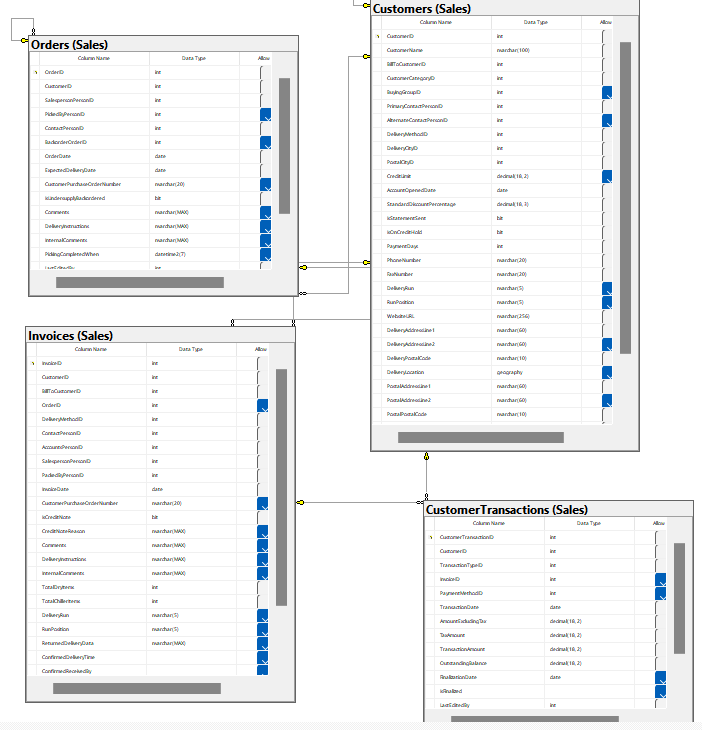

<u>Key View:</u>

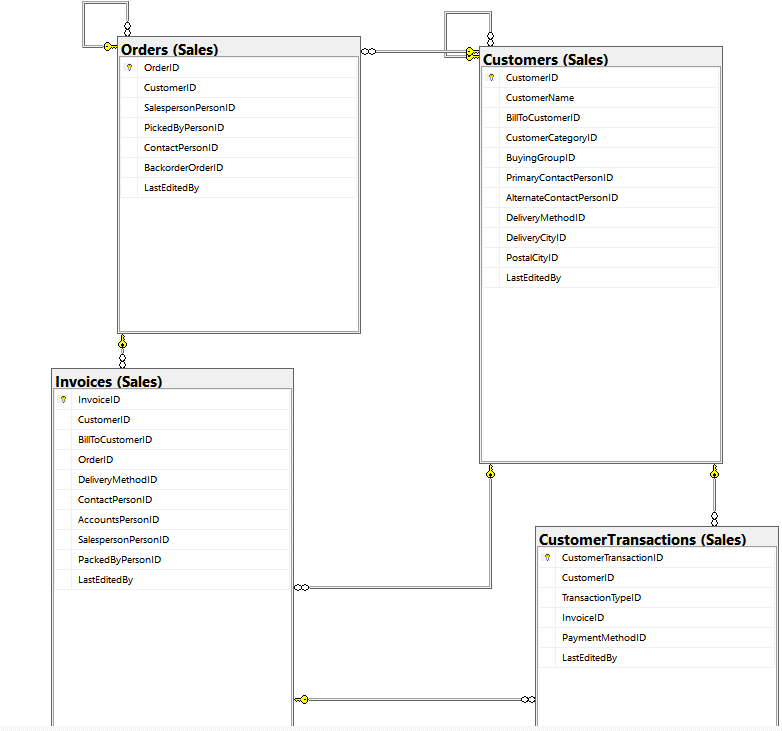

<u>Columns:</u>

| Table Names           | Columns Selected                          |
|-----------------------|-------------------------------------------|
| Sales.Customers       | CustomerID, CustomerName                  |
| Sales.Orders          | CustomerID, OrderDate, ExpectedDeliveryDate |
| Sales.CustomerTransactions | CustomerID, TransactionAmount         |
| Sales.Invoices        | OrderID, ConfirmedDeliveryTime            |


Order By:
| Table Name | Column Name           | Sort Order |
|------------|-----------------------|------------|
| Sales.CustomerTransactions | TransactionAmount     | DESC       |


In [4]:
USE WideWorldImporters;

WITH CustomerOrderDetails AS (
    SELECT
        C.CustomerName,
        O.OrderDate,
        O.ExpectedDeliveryDate,
        I.ConfirmedDeliveryTime,
        CT.TransactionAmount
    FROM
        Sales.Customers AS C
    JOIN
        Sales.Orders AS O ON C.CustomerID = O.CustomerID
    JOIN
        Sales.CustomerTransactions AS CT ON C.CustomerID = CT.CustomerID
    JOIN 
        Sales.Invoices AS I ON O.OrderID = I.OrderID
)
SELECT
    CustomerName,
    OrderDate,
    ExpectedDeliveryDate,
    FORMAT(ConfirmedDeliveryTime, 'yyyy-MM-dd') AS ConfirmedDeliveryDate, -- Formatted output
    CONCAT(RIGHT('0' + CONVERT(VARCHAR(2), DATEPART(hh, ConfirmedDeliveryTime) % 12), 2), 
           ':', 
           RIGHT('0' + CONVERT(VARCHAR(2), DATEPART(mi, ConfirmedDeliveryTime)), 2),
           ' ',
           CASE WHEN DATEPART(hh, ConfirmedDeliveryTime) < 12 THEN 'AM' ELSE 'PM' END) AS ConfirmedDeliveryTime, -- Standard time conversion
    TransactionAmount,
    CASE 
        WHEN CAST(ExpectedDeliveryDate AS DATE) = CAST(ConfirmedDeliveryTime AS DATE) THEN 'Same Day Delivery'
        WHEN ConfirmedDeliveryTime > ExpectedDeliveryDate THEN 'Delayed Delivery'
        ELSE 'On Time' -- You can modify this accordingly
    END AS DeliveryStatus
FROM
    CustomerOrderDetails
WHERE 
    TransactionAmount > 35000
    AND DATEDIFF(day, OrderDate, ExpectedDeliveryDate) >= 0 
    AND MONTH(OrderDate) = 4
ORDER BY
    TransactionAmount DESC;
--FOR JSON PATH, ROOT('Medium Top#3'), INCLUDE_NULL_VALUES;

(11 rows affected)

Total execution time: 00:00:00.034

CustomerName,OrderDate,ExpectedDeliveryDate,ConfirmedDeliveryDate,ConfirmedDeliveryTime,TransactionAmount,DeliveryStatus
Cong Hoa,2013-04-17,2013-04-18,2013-04-18,01:55 PM,36829.90,Same Day Delivery
Cong Hoa,2013-04-26,2013-04-29,2013-04-27,08:35 AM,36829.90,On Time
Cong Hoa,2013-04-26,2013-04-29,2013-05-01,07:20 AM,36829.90,Delayed Delivery
Cong Hoa,2014-04-14,2014-04-15,2014-04-15,09:40 AM,36829.90,Same Day Delivery
Cong Hoa,2014-04-25,2014-04-28,2014-04-26,03:25 PM,36829.90,On Time
Cong Hoa,2014-04-29,2014-04-30,2014-04-30,07:55 AM,36829.90,Same Day Delivery
Cong Hoa,2015-04-01,2015-04-02,2015-04-02,09:30 AM,36829.90,Same Day Delivery
Cong Hoa,2015-04-08,2015-04-09,2015-04-09,09:20 AM,36829.90,Same Day Delivery
Cong Hoa,2015-04-17,2015-04-20,2015-04-18,07:55 AM,36829.90,On Time
Cong Hoa,2015-04-27,2015-04-28,2015-04-28,11:35 AM,36829.90,Same Day Delivery


## **<mark style=background-color:#BFBBE4>Top Worst 3 Problems</mark>**

Prioritize their 3 worst problems (medium, and complex); explain why they chose these problems for their lowest rating. How can the problems be fixed to make them better?

## **Worst 1 (Medium - Northwinds2022TSQLV7)**

<u>Proposition:</u>

- Retrieve a query that calculates the yearly count of distinct customers, comparing the current year's number of customers with the previous year to determine if there was growth.
- Tables involved: Sales.[Orders], Sales.Customers

<u>Standard View:</u>

 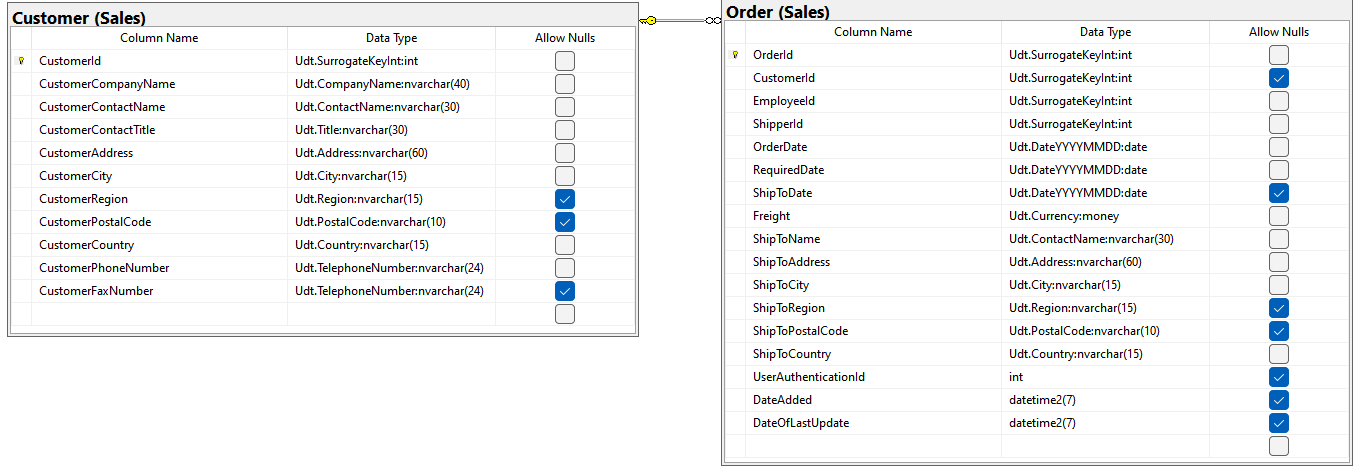

<u>Key View:</u>

 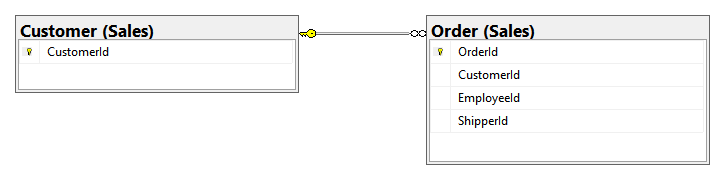

<u>Columns:</u>

| Table Name| Column Name|
| --- | --- |
| Sales.[Order] | OrderDate, CustomerId | 
| Sales.Customer | CustomerId, CustomerCity |


In [23]:
USE Northwinds2022TSQLV7;

WITH YearlyCount AS (
    SELECT 
        YEAR(OrderDate) AS YearOrder,
        COUNT(DISTINCT CustomerId) AS NumberCustomers
    FROM 
        Sales.[Order]
    GROUP BY 
        YEAR(OrderDate)
)

SELECT 
    Cur.YearOrder,
    Cur.NumberCustomers AS CurrentNumCustomers,
    Prv.NumberCustomers AS PreviousNumCustomers,
    Cur.NumberCustomers - Prv.NumberCustomers AS Growth,
    CASE 
        WHEN Prv.NumberCustomers IS NULL THEN 'No Previous Data'
        WHEN Cur.NumberCustomers > Prv.NumberCustomers THEN 'Growth'
        WHEN Cur.NumberCustomers < Prv.NumberCustomers THEN 'Decline'
        ELSE 'Unknown'
    END AS GrowthStatus,
    CustomerCity
FROM 
    YearlyCount AS Cur
LEFT OUTER JOIN 
    YearlyCount AS Prv ON Cur.YearOrder = Prv.YearOrder + 1
LEFT JOIN 
    Sales.Customer AS C ON Cur.NumberCustomers = C.CustomerId
FOR JSON PATH, ROOT('Medium Worst#1'), INCLUDE_NULL_VALUES;

--------------------------------------------------------------
-- Fixed 
--------------------------------------------------------------

USE Northwinds2022TSQLV7;

WITH YearlyCount AS (
    SELECT 
        YEAR(OrderDate) AS YearOrder,
        COUNT(DISTINCT CustomerId) AS NumberCustomers
    FROM 
        Sales.[Order]
    GROUP BY 
        YEAR(OrderDate)
)

SELECT 
    Cur.YearOrder,
    Cur.NumberCustomers AS CurrentNumCustomers,
    Prv.NumberCustomers AS PreviousNumCustomers,
    Cur.NumberCustomers - Prv.NumberCustomers AS Growth,
    CASE 
        WHEN Prv.NumberCustomers IS NULL THEN 'No Previous Data'
        WHEN Cur.NumberCustomers > Prv.NumberCustomers THEN 'Growth'
        WHEN Cur.NumberCustomers < Prv.NumberCustomers THEN 'Decline'
        ELSE 'Unknown'
    END AS GrowthStatus,
    CustomerCity
FROM 
    YearlyCount AS Cur
LEFT OUTER JOIN 
    YearlyCount AS Prv ON Cur.YearOrder = Prv.YearOrder + 1
LEFT JOIN 
    Sales.Customer AS C ON Cur.NumberCustomers = C.CustomerId
FOR JSON PATH, ROOT('Medium Worst#1'), INCLUDE_NULL_VALUES;



(3 rows affected)

(3 rows affected)

Total execution time: 00:00:00.033

JSON_F52E2B61-18A1-11d1-B105-00805F49916B
"{""MediumWorst#1"":[{""YearOrder"":2014,""CurrentNumCustomers"":67,""PreviousNumCustomers"":null,""Growth"":null,""GrowthStatus"":""No Previous Data"",""CustomerCity"":""Rio de Janeiro""},{""YearOrder"":2015,""CurrentNumCustomers"":86,""PreviousNumCustomers"":67,""Growth"":19,""GrowthStatus"":""Growth"",""CustomerCity"":""Stuttgart""},{""YearOrder"":2016,""CurrentNumCustomers"":81,""PreviousNumCustomers"":86,""Growth"":-5,""GrowthStatus"":""Decline"",""CustomerCity"":""Sao Paulo""}]}"


JSON_F52E2B61-18A1-11d1-B105-00805F49916B
"{""MediumWorst#1"":[{""YearOrder"":2014,""CurrentNumCustomers"":67,""PreviousNumCustomers"":null,""Growth"":null,""GrowthStatus"":""No Previous Data"",""CustomerCity"":""Rio de Janeiro""},{""YearOrder"":2015,""CurrentNumCustomers"":86,""PreviousNumCustomers"":67,""Growth"":19,""GrowthStatus"":""Growth"",""CustomerCity"":""Stuttgart""},{""YearOrder"":2016,""CurrentNumCustomers"":81,""PreviousNumCustomers"":86,""Growth"":-5,""GrowthStatus"":""Decline"",""CustomerCity"":""Sao Paulo""}]}"


## **Worst 2 (Medium - AdventureWorks2017)**

<u>Proposition:</u>

- Retrieve a query to analyze the influence of rate changes on employees' personal status and job roles
- Tables involved: HumanResources.EmployeePayHistory, HumanResources.Employee

<u>Standard View:</u>

 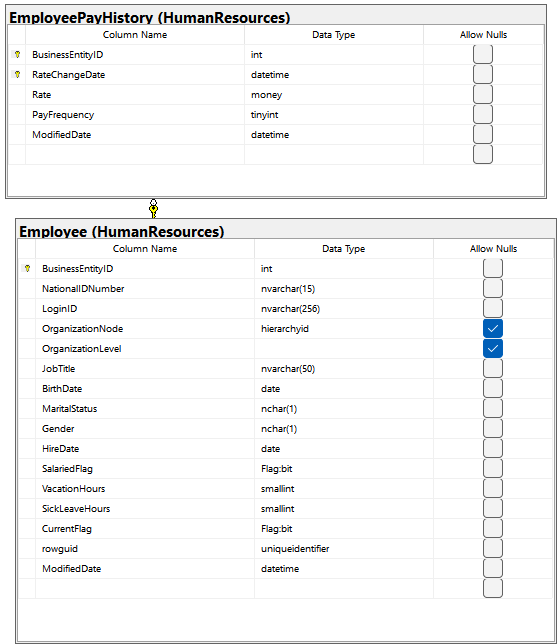

<u>Key View:</u>

 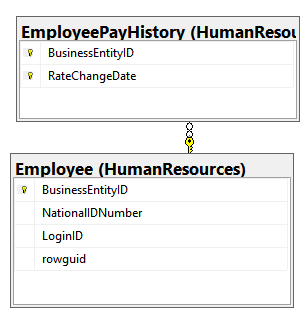

 <u> Standard View Fixed: </u>

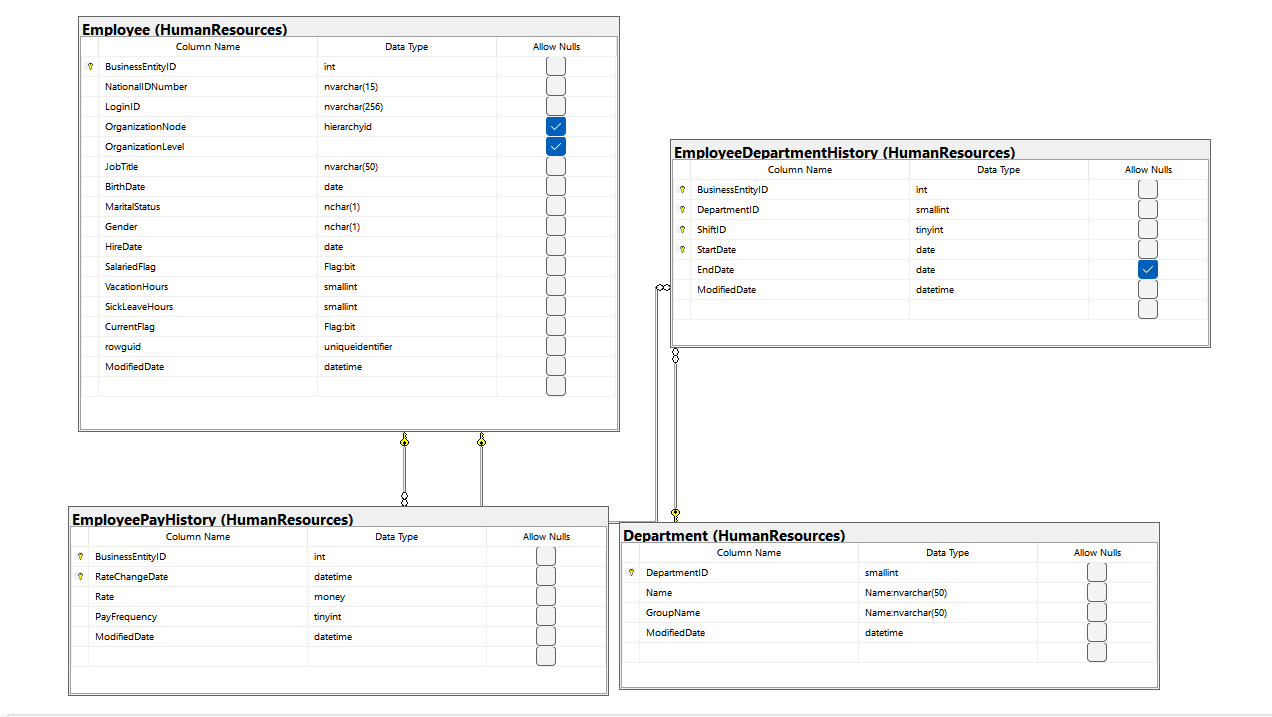

 <u>Key View Fixed: </u>

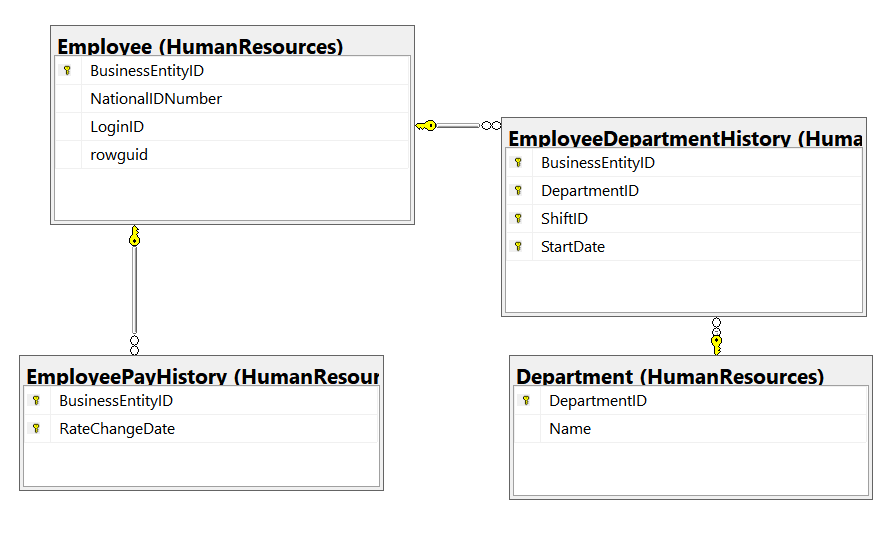

<u>Columns:</u>

| Table Name| Column Name|
| --- | --- |
| HumanResources.EmployeePayHistory | Rate, Year | 
| HumanResources.Employee | JobTitle, MaritalStatus, Gender, VacationHours, SickLeaveHours |

Columns of Fixed:
| Table Names                  | Columns Selected                          |
|------------------------------|-------------------------------------------|
| HumanResources.Employee      | BusinessEntityID, JobTitle, Gender, VacationHours, SickLeaveHours |
| HumanResources.EmployeePayHistory | Rate, BusinessEntityID, RateChangeDate |
| HumanResources.EmployeeDepartmentHistory | BusinessEntityID, DepartmentID |
| HumanResources.Department    | DepartmentID, Name                        |


Order By:
| Table Name | Column Name | Sort Order |
|------------|-------------|------------|
| HumanResources.Employee | Gender      | ASC        |
| HumanResources.Employee | JobTitle    | ASC        |


In [24]:
USE AdventureWorks2017;

WITH RateChanges AS (
    SELECT 
        Rate,
        BusinessEntityID,
        YEAR(RateChangeDate) AS Year,
        MONTH(RateChangeDate) AS Month
    FROM 
        HumanResources.EmployeePayHistory
)
SELECT 
    E.JobTitle, 
    E.MaritalStatus, 
    E.Gender, 
    E.VacationHours, 
    E.SickLeaveHours,
    RC.Rate,
    RC.Year
FROM 
    HumanResources.Employee AS E
INNER JOIN 
    RateChanges AS RC 
ON 
    RC.BusinessEntityID = E.BusinessEntityID
WHERE 
    E.JobTitle = N'Application Specialist' 
    OR E.JobTitle = N'Design Engineer'
ORDER BY 
    E.Gender, 
    E.JobTitle
FOR JSON PATH, ROOT('Medium Worst#2'), INCLUDE_NULL_VALUES;



---------------------------------------------------------------
-- Fixed
---------------------------------------------------------------
-- Tables involved: HumanResources.EmployeePayHistory, HumanResources.Employee, HumanResources.EmployeeDepartmentHistory, HumanResources.Department

USE AdventureWorks2017;

WITH RateChanges AS (
    SELECT 
        Rate,
        BusinessEntityID,
        YEAR(RateChangeDate) AS Year,
        MONTH(RateChangeDate) AS Month
    FROM 
        HumanResources.EmployeePayHistory
)
SELECT 
    E.JobTitle, 
    E.Gender, 
    E.VacationHours, 
    E.SickLeaveHours,
    RC.Rate,
    RC.Year,
    D.Name
FROM 
    HumanResources.Employee AS E
INNER JOIN 
    RateChanges AS RC 
ON 
    RC.BusinessEntityID = E.BusinessEntityID
INNER JOIN
    HumanResources.EmployeeDepartmentHistory AS EDH
ON
    EDH.BusinessEntityID = E.BusinessEntityID
INNER JOIN
    HumanResources.Department AS D
ON  
    D.DepartmentID = EDH.DepartmentID
WHERE 
    E.JobTitle = N'Application Specialist' 
    OR E.JobTitle = N'Design Engineer'
ORDER BY 
    E.JobTitle
FOR JSON PATH, ROOT('Medium Worst#2'), INCLUDE_NULL_VALUES;


(7 rows affected)

(7 rows affected)

Total execution time: 00:00:00.087

JSON_F52E2B61-18A1-11d1-B105-00805F49916B
"{""Medium Worst#2"":[{""JobTitle"":""Application Specialist"",""MaritalStatus"":""S"",""Gender"":""F"",""VacationHours"":74,""SickLeaveHours"":57,""Rate"":27.4038,""Year"":2009},{""JobTitle"":""Application Specialist"",""MaritalStatus"":""M"",""Gender"":""F"",""VacationHours"":71,""SickLeaveHours"":55,""Rate"":27.4038,""Year"":2008},{""JobTitle"":""Design Engineer"",""MaritalStatus"":""M"",""Gender"":""F"",""VacationHours"":4,""SickLeaveHours"":22,""Rate"":32.6923,""Year"":2011},{""JobTitle"":""Design Engineer"",""MaritalStatus"":""M"",""Gender"":""F"",""VacationHours"":5,""SickLeaveHours"":22,""Rate"":32.6923,""Year"":2008},{""JobTitle"":""Application Specialist"",""MaritalStatus"":""S"",""Gender"":""M"",""VacationHours"":73,""SickLeaveHours"":56,""Rate"":27.4038,""Year"":2009},{""JobTitle"":""Application Specialist"",""MaritalStatus"":""M"",""Gender"":""M"",""VacationHours"":72,""SickLeaveHours"":56,""Rate"":27.4038,""Year"":2009},{""JobTitle"":""Design Engineer"",""MaritalStatus"":""M"",""Gender"":""M"",""VacationHours"":6,""SickLeaveHours"":23,""Rate"":32.6923,""Year"":2008}]}"


JSON_F52E2B61-18A1-11d1-B105-00805F49916B
"{""Medium Worst#2"":[{""JobTitle"":""Application Specialist"",""Gender"":""F"",""VacationHours"":74,""SickLeaveHours"":57,""Rate"":27.4038,""Year"":2009,""Name"":""Information Services""},{""JobTitle"":""Application Specialist"",""Gender"":""M"",""VacationHours"":73,""SickLeaveHours"":56,""Rate"":27.4038,""Year"":2009,""Name"":""Information Services""},{""JobTitle"":""Application Specialist"",""Gender"":""M"",""VacationHours"":72,""SickLeaveHours"":56,""Rate"":27.4038,""Year"":2009,""Name"":""Information Services""},{""JobTitle"":""Application Specialist"",""Gender"":""F"",""VacationHours"":71,""SickLeaveHours"":55,""Rate"":27.4038,""Year"":2008,""Name"":""Information Services""},{""JobTitle"":""Design Engineer"",""Gender"":""F"",""VacationHours"":5,""SickLeaveHours"":22,""Rate"":32.6923,""Year"":2008,""Name"":""Engineering""},{""JobTitle"":""Design Engineer"",""Gender"":""M"",""VacationHours"":6,""SickLeaveHours"":23,""Rate"":32.6923,""Year"":2008,""Name"":""Engineering""},{""JobTitle"":""Design Engineer"",""Gender"":""F"",""VacationHours"":4,""SickLeaveHours"":22,""Rate"":32.6923,""Year"":2011,""Name"":""Engineering""}]}"


## **Worst 3 (Medium - <mark><mark>A</mark></mark>dventureWorks2017)**

<u>Proposition:</u>

- Write <mark>a</mark> <mark>query</mark> th<mark>a</mark>t retrieves inform<mark>a</mark>tion <mark>a</mark>bout employees from the <mark>A</mark>dventureWorks2017 d<mark>a</mark>t<mark>a</mark>b<mark>a</mark>se b<mark>a</mark>sed on specific criteri<mark>a</mark> for their v<mark>a</mark>c<mark>a</mark>tion <mark>a</mark>nd sick le<mark>a</mark>ve hours. This <mark>query</mark> selects the employees' job title, m<mark>a</mark>rit<mark>a</mark>l st<mark>a</mark>tus, gender, v<mark>a</mark>c<mark>a</mark>tion hours, sick le<mark>a</mark>ve hours, p<mark>a</mark>y r<mark>a</mark>te ch<mark>a</mark>nges over time, <mark>a</mark>nd the corresponding ye<mark>a</mark>r of the r<mark>a</mark>te ch<mark>a</mark>nge
- <span style="color: var(--vscode-foreground);">T<mark data-markjs="true" class="rangeHighlight">a</mark>bles involved:&nbsp;</span> Hum<mark>a</mark><span style="color: var(--vscode-foreground);">nResources.Employee, Hum</span><mark>a</mark><span style="color: var(--vscode-foreground);">nResources.EmployeeP</span><mark>a</mark><span style="color: var(--vscode-foreground);">yHistory</span>

<u>St<mark><mark>a</mark></mark>nd<mark><mark>a</mark></mark>rd View:</u>

![](c:\Users\damar\OneDrive\Pictures\Screenshots\Screenshot&#32;2024-03-24&#32;184521.png)

<u>Key View:</u>

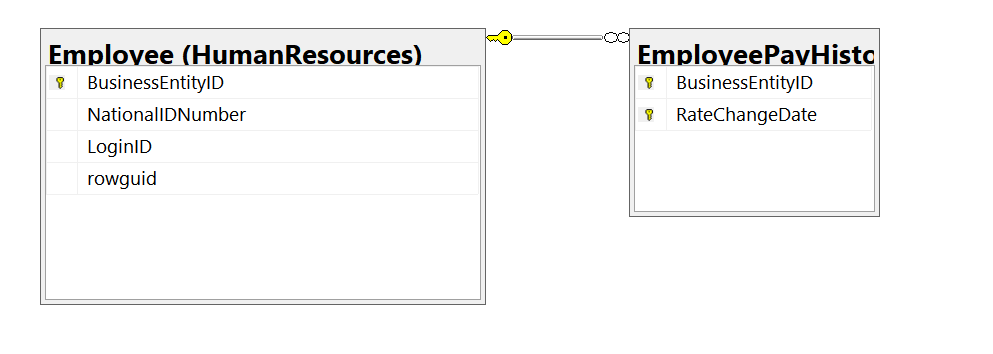

<u>Columns:</u>

| Table Names                  | Columns Selected                          |
|------------------------------|-------------------------------------------|
| HumanResources.Employee      | BusinessEntityID, LoginID, OrganizationLevel, JobTitle, MaritalStatus, Gender, VacationHours, SickLeaveHours |
| HumanResources.EmployeePayHistory | Rate, BusinessEntityID, RateChangeDate |

Order By:
| Table Name | Column Name | Sort Order |
|------------|-------------|------------|
|HumanResources.Employee | Gender | ASC |
|HumanResources.Employee | JobTitle  | ASC  |


In [74]:
USE AdventureWorks2017;

WITH RateChanges AS (
    SELECT 
        Rate,
        BusinessEntityID,
        YEAR(RateChangeDate) AS Year,
        MONTH(RateChangeDate) AS Month
    FROM 
        HumanResources.EmployeePayHistory
)
SELECT 
    E.LoginID,
    E.OrganizationLevel,
    E.JobTitle, 
    E.MaritalStatus, 
    E.Gender, 
    E.VacationHours, 
    E.SickLeaveHours,
    RC.Rate,
    RC.Year
FROM 
    HumanResources.Employee AS E
INNER JOIN 
    RateChanges AS RC 
ON 
    RC.BusinessEntityID = E.BusinessEntityID
WHERE 
    E.VacationHours BETWEEN 30 AND 50
    AND E.SickLeaveHours BETWEEN 20 AND 40
ORDER BY 
    E.Gender, 
    E.JobTitle
--FOR JSON PATH, ROOT('Medium Worst#3'), INCLUDE_NULL_VALUES;


---------------------------------------------------------------
-- Fixed
---------------------------------------------------------------

USE AdventureWorks2017;
GO
DROP FUNCTION IF EXISTS dbo.GetOrgInfo;
GO
CREATE FUNCTION dbo.GetOrgInfo
(
    @orglevel INT
)
RETURNS TABLE
AS
RETURN
(
    WITH RateChanges AS (
        SELECT 
            Rate,
            BusinessEntityID,
            YEAR(RateChangeDate) AS Year,
            MONTH(RateChangeDate) AS Month
        FROM 
            HumanResources.EmployeePayHistory
    )
    SELECT 
        E.LoginID,
        E.JobTitle, 
        E.MaritalStatus, 
        E.Gender, 
        E.VacationHours, 
        E.SickLeaveHours,
        RC.Rate,
        RC.Year
    FROM 
        HumanResources.Employee AS E
    INNER JOIN 
        RateChanges AS RC 
    ON 
        RC.BusinessEntityID = E.BusinessEntityID
    WHERE 
        E.OrganizationLevel = @orglevel
)
GO
SELECT * 
FROM dbo.GetOrgInfo(3)
ORDER BY Gender, JobTitle
--FOR JSON PATH, ROOT('Medium Worst#3'), INCLUDE_NULL_VALUES;
;
DROP FUNCTION IF EXISTS dbo.GetOrgInfo;
GO






(36 rows affected)

Commands completed successfully.

Commands completed successfully.

(72 rows affected)

Total execution time: 00:00:00.034

LoginID,OrganizationLevel,JobTitle,MaritalStatus,Gender,VacationHours,SickLeaveHours,Rate,Year
adventure-works\wanida0,2,Marketing Assistant,M,F,41,40,13.4615,2011
adventure-works\sandra0,4,Production Technician - WC30,M,F,37,38,9.50,2008
adventure-works\susan1,4,Production Technician - WC30,S,F,31,35,9.50,2008
adventure-works\nancy0,4,Production Technician - WC60,M,F,34,37,12.45,2009
adventure-works\lynn0,3,Sales Representative,S,F,36,38,23.0769,2013
adventure-works\rachel0,3,Sales Representative,S,F,35,37,23.0769,2013
adventure-works\jae0,3,Sales Representative,M,F,37,38,23.0769,2012
adventure-works\david0,1,Marketing Manager,S,M,40,40,24.00,2007
adventure-works\david0,1,Marketing Manager,S,M,40,40,28.75,2009
adventure-works\david0,1,Marketing Manager,S,M,40,40,37.50,2012


LoginID,JobTitle,MaritalStatus,Gender,VacationHours,SickLeaveHours,Rate,Year
adventure-works\barbara1,Accountant,M,F,58,49,26.4423,2009
adventure-works\janet0,Accounts Payable Specialist,M,F,64,52,19.00,2009
adventure-works\deborah0,Accounts Receivable Specialist,M,F,60,50,19.00,2008
adventure-works\candy0,Accounts Receivable Specialist,S,F,61,50,19.00,2009
adventure-works\mindy0,Benefits Specialist,M,F,51,45,16.5865,2008
adventure-works\gail0,Design Engineer,M,F,5,22,32.6923,2008
adventure-works\sharon0,Design Engineer,M,F,4,22,32.6923,2011
adventure-works\katie0,Production Supervisor - WC20,S,F,42,41,25.00,2009
adventure-works\cynthia0,Production Supervisor - WC30,S,F,69,54,25.00,2009
adventure-works\brenda0,Production Supervisor - WC40,M,F,71,55,25.00,2009


## Q7 (Medium - WideWorldImporters)

<u>Proposition:</u>

- Retrieve information about the maximum transaction amount paid by each customer on February 2, 2015, along with details about where the customer spent this amount and the website URL associated with the customer.
- Tables involved: Sales.CustomerTransactions, Sales.Orders, Website.Customers
    

<u>Standard View:</u>

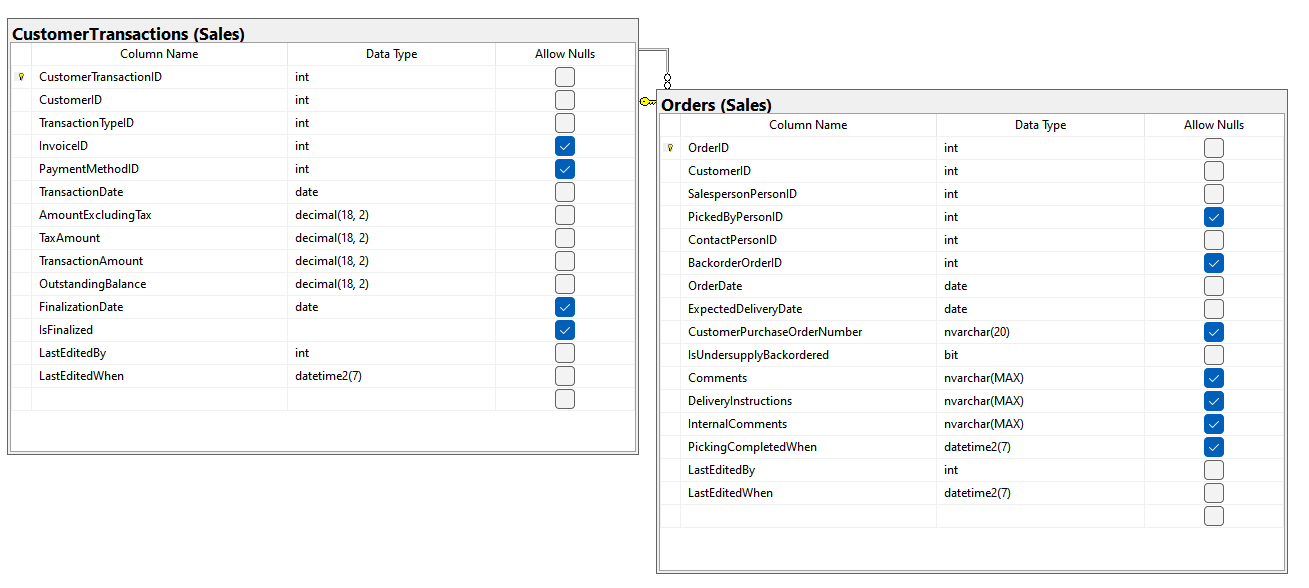

<u>Key View:</u>

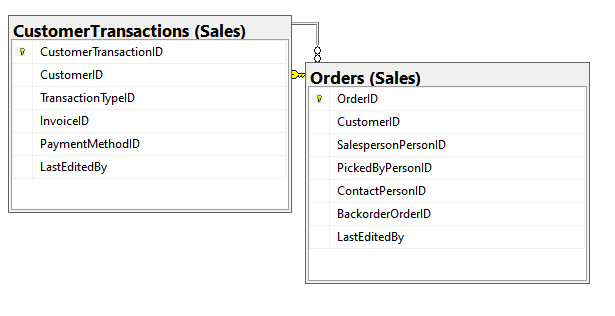

<u>Columns:</u>

| Table Names              | Columns Selected            |
|--------------------------|-----------------------------|
| Sales.CustomerTransactions | TransactionAmount, CustomerID |
| Sales.Orders             | CustomerID, OrderDate       |
| Website.Customers        | CustomerID, CustomerCategoryName, WebsiteURL |

Order By:
| Table Name | Column Name      | Sort Order |
|------------|------------------|------------|
|            | TotalAmountPaid  | DESC       |


In [ ]:
USE WideWorldImporters;

WITH CustomersPayment AS
(
    SELECT
        MAX(TransactionAmount) AS TotalAmountPaid,
        COUNT(DISTINCT CustomerID) AS NumberCustomers,
        CustomerID
    FROM Sales.CustomerTransactions
    GROUP BY CustomerID
)

SELECT
    CP.TotalAmountPaid,
    SO.OrderDate,
    WC.CustomerCategoryName,
    WC.WebsiteURL
FROM 
    CustomersPayment AS CP
INNER JOIN
    Sales.Orders AS SO ON CP.CustomerID = SO.CustomerID
INNER JOIN  
    Website.Customers AS WC ON WC.CustomerID = SO.CustomerID
WHERE   
   SO.OrderDate = '20150202'

ORDER BY 
    TotalAmountPaid DESC
--FOR JSON PATH, ROOT('MediumWorst#1'), INCLUDE_NULL_VALUES;

## Q8 (Medium - AdventureWorksDW2017)

<u>Proposition:</u>

- Return a query that analyzes seasonal trends in bike sales based on gender in the United States for the year 2011. The query should categorize sales data into cold weather (December to May) and warm weather (June to November) seasons and provide insights into the total sales amount and the number of orders placed by customers of different genders across different sales territory regions.
- Tables involved:  dbo.DimCustomer, dbo.FactInternetSales, dbo.DimSalesTerritory, dbo.DimProduct, dbo.DimProductSubcategory, dbo.DimProductCategory.
    

<u>Standard View:</u>

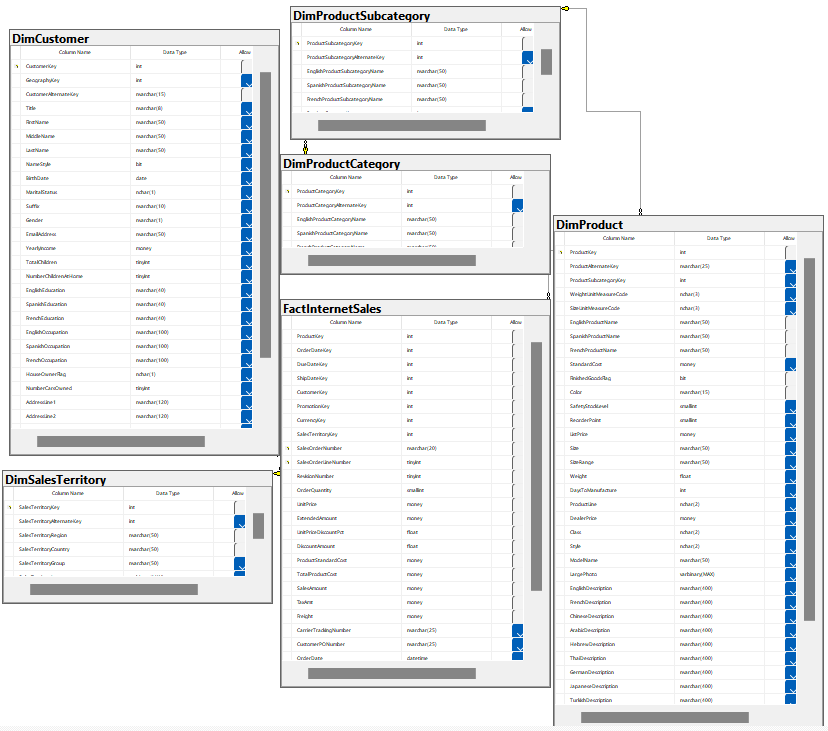

<u>Key View:</u>

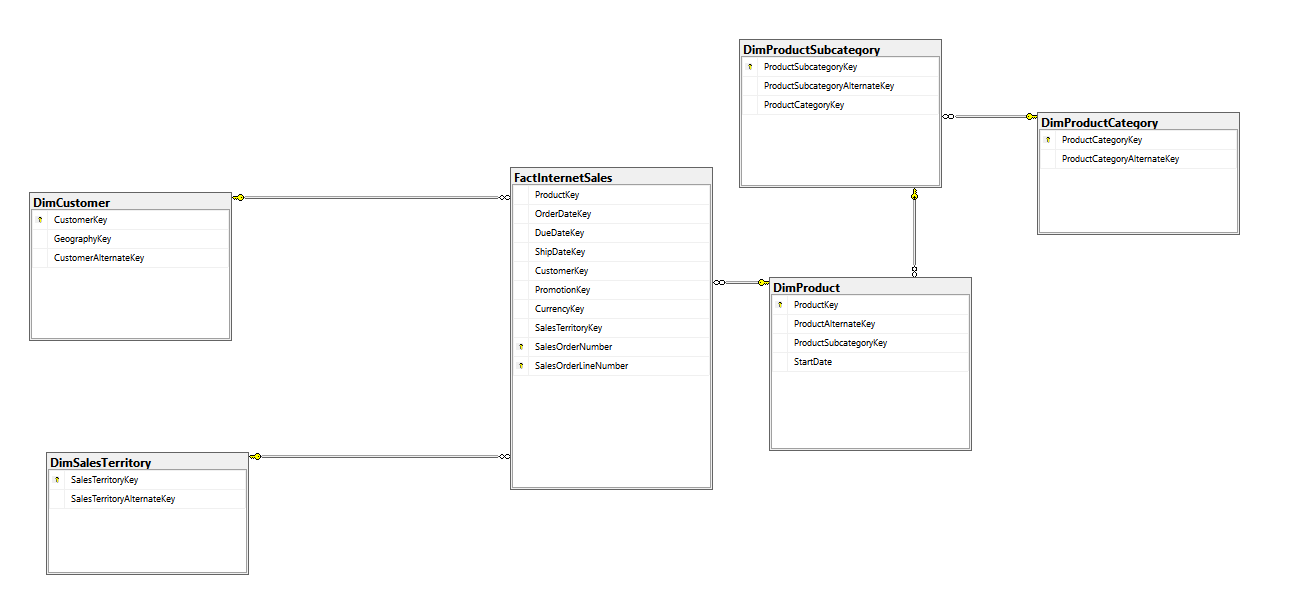

<u>Columns:</u>

| Table Names              | Columns Selected                                 |
|--------------------------|--------------------------------------------------|
| dbo.DimCustomer          | CustomerKey, Gender                              |
| dbo.FactInternetSales    | SalesAmount, OrderDate, CustomerKey, ProductKey, SalesTerritoryKey |
| dbo.DimSalesTerritory    | SalesTerritoryKey, SalesTerritoryCountry, SalesTerritoryRegion |
| dbo.DimProduct           | ProductKey                                        |
| dbo.DimProductSubcategory| ProductSubcategoryKey                            |
| dbo.DimProductCategory   | ProductCategoryKey, EnglishProductCategoryName   |

Order By:
| Table Name              | Column Name          | Sort Order |
|-------------------------|----------------------|------------|
| DerivedTable            | OrderYear            | ASC        |
| DerivedTable            | Season               | ASC        |
| DerivedTable            | Gender               | ASC        |
| DerivedTable            | SalesTerritoryRegion | ASC        |



In [48]:
USE AdventureWorksDW2017;

SELECT 
    YEAR(DerivedTable.OrderDate) AS OrderYear,
    CASE
        WHEN MONTH(DerivedTable.OrderDate) IN (12, 1, 2, 3, 4 ,5) THEN 'Cold Weather'
        WHEN MONTH(DerivedTable.OrderDate) IN (6, 7, 8, 9, 10, 11) THEN 'Warm Weather'
        ELSE 'Unknown'
    END AS Season,
    DerivedTable.Gender,
    SUM(DerivedTable.MaxSalesAmount) AS TotalSalesAmount,
    COUNT(*) AS NumberOfOrders,
    DerivedTable.SalesTerritoryRegion,
    DerivedTable.EnglishProductCategoryName AS ProductName
FROM (
    SELECT 
        MAX(S.SalesAmount) AS MaxSalesAmount,
        S.OrderDate,
        C.Gender,
        DT.SalesTerritoryCountry,
        DT.SalesTerritoryRegion,
        DPC.EnglishProductCategoryName
    FROM dbo.DimCustomer AS C
    INNER JOIN dbo.FactInternetSales AS S ON C.CustomerKey = S.CustomerKey
    INNER JOIN dbo.DimSalesTerritory AS DT ON S.SalesTerritoryKey = DT.SalesTerritoryKey
    INNER JOIN dbo.DimProduct AS DP ON DP.ProductKey = S.ProductKey
    INNER JOIN dbo.DimProductSubcategory AS DPS ON DPS.ProductSubcategoryKey = DP.ProductSubcategoryKey
    INNER JOIN dbo.DimProductCategory AS DPC ON DPC.ProductCategoryKey = DPS.ProductCategoryKey
    WHERE DT.SalesTerritoryCountry = 'United States'
    GROUP BY S.OrderDate, C.Gender, DT.SalesTerritoryCountry, DPC.EnglishProductCategoryName, DT.SalesTerritoryRegion
) AS DerivedTable
WHERE 
    DerivedTable.EnglishProductCategoryName = N'Bikes'
    AND YEAR(DerivedTable.OrderDate) = '2011'
GROUP BY YEAR(DerivedTable.OrderDate), 
    CASE
        WHEN MONTH(DerivedTable.OrderDate) IN (12, 1, 2, 3, 4 ,5) THEN 'Cold Weather'
        WHEN MONTH(DerivedTable.OrderDate) IN (6, 7, 8, 9, 10, 11) THEN 'Warm Weather'
        ELSE 'Unknown'
    END,
    DerivedTable.Gender,
    DerivedTable.SalesTerritoryRegion,
    DerivedTable.EnglishProductCategoryName
ORDER BY OrderYear, Season, DerivedTable.Gender, DerivedTable.SalesTerritoryRegion;


(8 rows affected)

Total execution time: 00:00:00.055

OrderYear,Season,Gender,TotalSalesAmount,NumberOfOrders,SalesTerritoryRegion,ProductName
2011,Cold Weather,F,138092.5292,44,Northwest,Bikes
2011,Cold Weather,F,276010.8038,85,Southwest,Bikes
2011,Cold Weather,M,201108.9435,61,Northwest,Bikes
2011,Cold Weather,M,257593.8817,78,Southwest,Bikes
2011,Warm Weather,F,209038.0928,62,Northwest,Bikes
2011,Warm Weather,F,316603.731,93,Southwest,Bikes
2011,Warm Weather,M,224819.8702,72,Northwest,Bikes
2011,Warm Weather,M,291319.782,90,Southwest,Bikes


## Q9 (Medium - WideWorldImporters)

<u>Proposition:</u>

- Return a query where a virtual table named Sales.NYCusts is created. This table provides information about customers in New York.
- Tables involved: Sales.Customers, Sales.Orders, Sales.CustomerCategories, Application.Cities, Application.StateProvinces, and Sales.OrderLines.

<u>Standard View:</u>

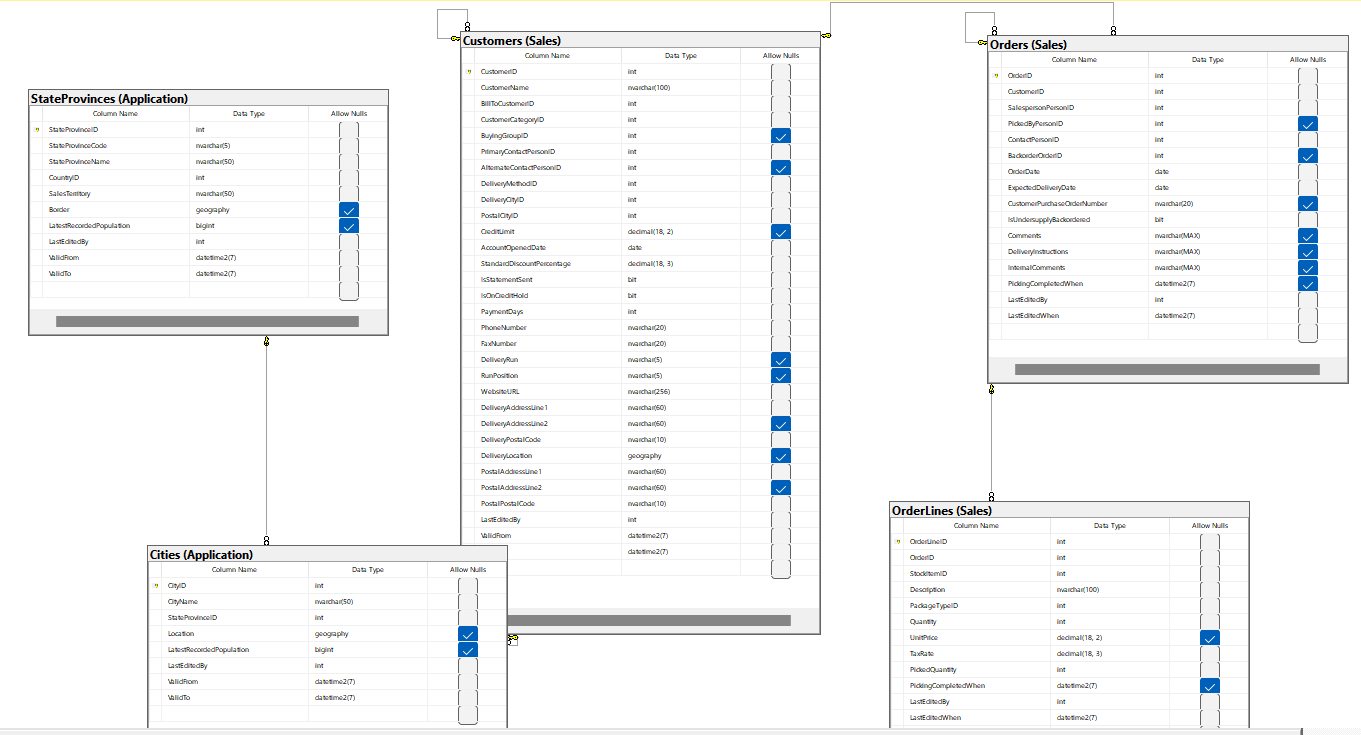

<u>Key View:</u>

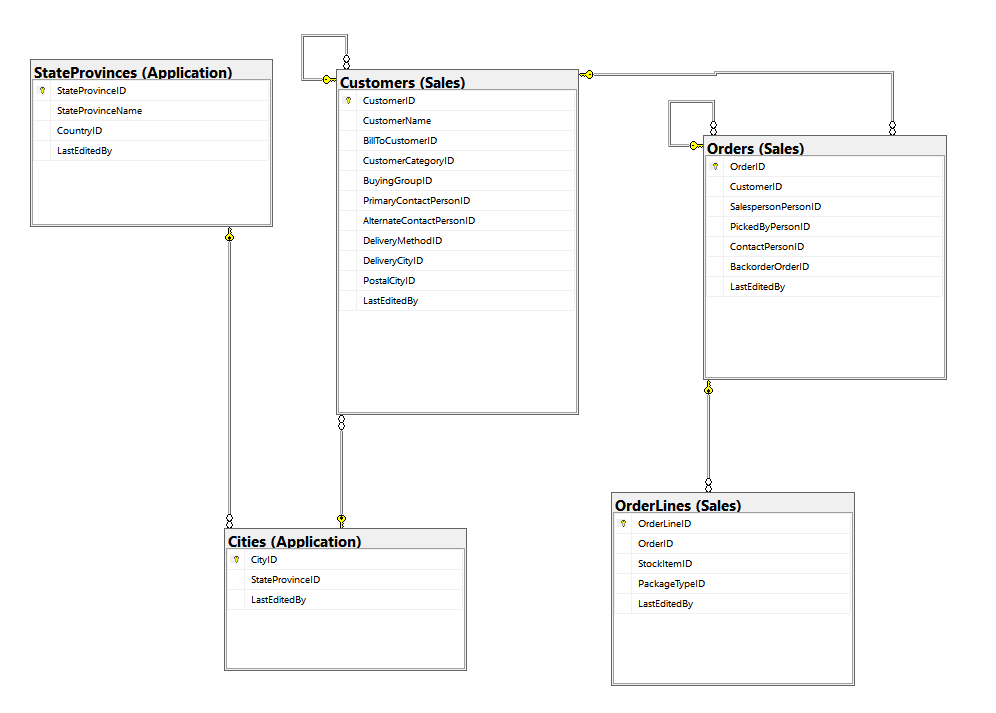

<u>Columns:</u>

| Table Names              | Columns Selected                                    |
|--------------------------|-----------------------------------------------------|
| Sales.Customers          | CustomerID, PhoneNumber, CustomerName, CreditLimit, DeliveryCityID, CustomerCategoryID |
| Sales.Orders             | OrderID, CustomerID, OrderDate                      |
| Sales.CustomerCategories | CustomerCategoryID, CustomerCategoryName            |
| Application.Cities       | CityID, CityName, StateProvinceID                   |
| Application.StateProvinces | StateProvinceID, StateProvinceName                 |
| sales.OrderLines         | OrderID, UnitPrice, Quantity                         |

Order By:
| Table Name | Column Name      | Sort Order |
|------------|------------------|------------|
|  Sales.Customers             | CustomerName     | ASC        |


In [27]:
USE WideWorldImporters;

DROP VIEW IF EXISTS Sales.NYCusts;
GO

CREATE VIEW Sales.NYCusts
AS
SELECT 
    sc.PhoneNumber, 
    sc.CustomerName, 
    MAX(sc.CreditLimit) AS MaxCreditLimit, -- Maximum credit limit among customers
    so.OrderDate, 
    cc.CustomerCategoryName, 
    ac.CityName, 
    sp.StateProvinceName, 
    ROUND(SUM(ol.UnitPrice * ol.Quantity), 2) AS TotalAmountSpent -- Total amount spent by customers
FROM 
    Sales.Customers AS sc 
INNER JOIN 
    Sales.Orders AS so ON sc.CustomerID = so.CustomerID
INNER JOIN 
    Sales.CustomerCategories AS cc ON cc.CustomerCategoryID = sc.CustomerCategoryID
INNER JOIN 
    Application.Cities AS ac ON sc.DeliveryCityID = ac.CityID
INNER JOIN 
    Application.StateProvinces AS sp ON sp.StateProvinceID = ac.StateProvinceID
INNER JOIN 
    sales.OrderLines AS ol ON so.OrderID = ol.OrderID
WHERE 
    sp.StateProvinceName = N'New York' 
    AND sc.CustomerName NOT LIKE 'Tailspin Toys (%)' 
    AND sc.CustomerName NOT LIKE 'Wingtip Toys (%)' 
    AND YEAR(so.OrderDate) = '2015'
    AND MONTH(so.OrderDate) = '3'
GROUP BY
    sc.PhoneNumber,
    sc.CustomerName,
    so.OrderDate,
    cc.CustomerCategoryName,
    ac.CityName,
    sp.StateProvinceName;

GO

SELECT DISTINCT 
    CustomerName, 
    MaxCreditLimit, 
    TotalAmountSpent,
    OrderDate,
    StateProvinceName, 
    CustomerCategoryName AS CategoryName
FROM 
    Sales.NYCusts
GO

-- Cleanup
DROP VIEW IF EXISTS Sales.NYCusts;


Commands completed successfully.

Commands completed successfully.

(34 rows affected)

Commands completed successfully.

Total execution time: 00:00:00.120

CustomerName,MaxCreditLimit,TotalAmountSpent,OrderDate,StateProvinceName,CategoryName
Kertu Sokk,3000.00,1324.25,2015-03-17,New York,Computer Store
Stefan Selezeanu,3300.00,5024.00,2015-03-16,New York,Computer Store
Nicolo Cattaneo,1800.00,2551.20,2015-03-17,New York,Corporate
Stefan Selezeanu,3300.00,1116.00,2015-03-07,New York,Computer Store
Bhaamini Palagummi,2300.00,2202.00,2015-03-03,New York,Gift Store
Jitka Necesana,3200.00,852.00,2015-03-16,New York,Computer Store
Arijit Bhuiyan,2200.00,1950.50,2015-03-19,New York,Computer Store
Bhaamini Palagummi,2300.00,1245.00,2015-03-13,New York,Gift Store
Gayatri Gajula,4000.00,1058.00,2015-03-19,New York,Computer Store
Jakub Lukes,2100.00,2402.40,2015-03-11,New York,Corporate


## Q10 (Medium - WorldWideImposters)

<u>Proposition:</u>

- Return a query that analyzes sales data from 2015, focusing on high-value transactions in February to ensure timely deliveries. 
- Tables involved include Sales.Customers, Sales.Orders, Sales.CustomerTransactions, and Sales.Invoices.
    

<u>Standard View:</u>

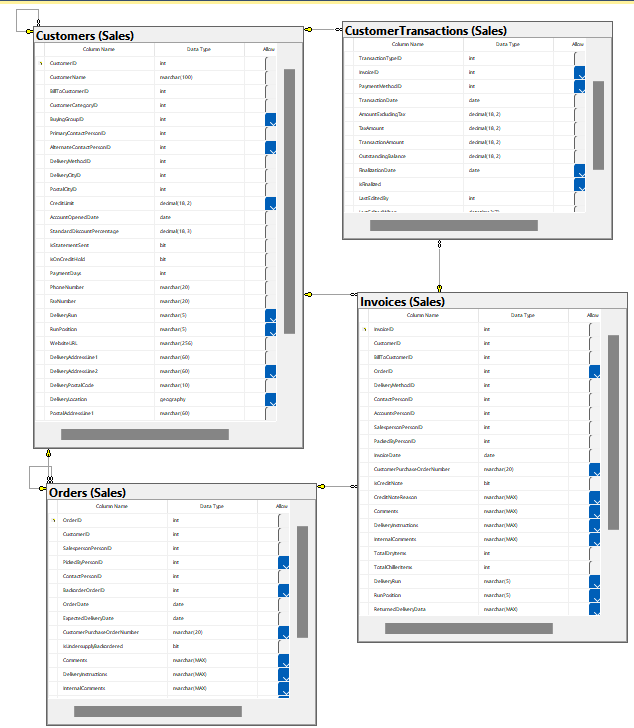

<u>Key View:</u>

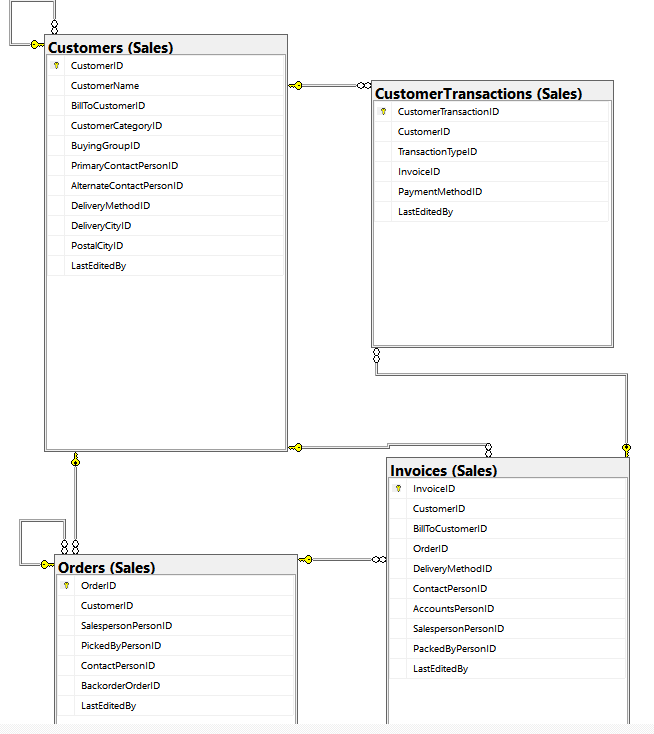

<u>Columns:</u>

| Table Names              | Columns Selected                          |
|--------------------------|-------------------------------------------|
| Sales.Customers          | CustomerID, CustomerName                  |
| Sales.Orders             | OrderID, CustomerID, OrderDate, ExpectedDeliveryDate |
| Sales.CustomerTransactions | CustomerID, TransactionAmount            |
| Sales.Invoices           | CustomerID, ConfirmedDeliveryTime         |


Order By:
| Table Name | Column Name          | Sort Order |
|------------|----------------------|------------|
| Sales.CustomerTransactions           | TransactionAmount    | DESC       |


In [76]:
USE WideWorldImporters;
WITH CustomerOrderDetails AS (
    SELECT
        C.CustomerName,
        O.OrderDate,
        O.ExpectedDeliveryDate,
        CT.TransactionAmount,
		I.ConfirmedDeliveryTime
    FROM
        Sales.Customers AS C
    JOIN
        Sales.Orders AS O ON C.CustomerID = O.CustomerID
    JOIN
        Sales.CustomerTransactions AS CT ON C.CustomerID = CT.CustomerID
	JOIN 
		Sales.Invoices AS I ON C.CustomerID = I.CustomerID
)
SELECT
    CustomerName,
    OrderDate,
    ExpectedDeliveryDate,
	ConfirmedDeliveryTime,
    TransactionAmount

FROM
    CustomerOrderDetails
WHERE 
    YEAR(OrderDate) = '2015' 
	AND YEAR(ConfirmedDeliveryTime) = '2015'
    AND MONTH(OrderDate) = '02'
	AND MONTH(ConfirmedDeliveryTIme) = '02'
    AND TransactionAmount > 35000
	 AND DATEDIFF(day, OrderDate, ExpectedDeliveryDate) >= 0 
GROUP BY
    CustomerName,
    OrderDate,
    ExpectedDeliveryDate,
    TransactionAmount,
	ConfirmedDeliveryTime
ORDER BY
    TransactionAmount DESC;
--FOR JSON PATH, ROOT('MedOutput'), INCLUDE_NULL_VALUES;


(9 rows affected)

Total execution time: 00:00:00.143

CustomerName,OrderDate,ExpectedDeliveryDate,ConfirmedDeliveryTime,TransactionAmount
Cong Hoa,2015-02-10,2015-02-11,2015-02-11 11:20:00.0000000,36829.90
Cong Hoa,2015-02-10,2015-02-11,2015-02-12 08:05:00.0000000,36829.90
Cong Hoa,2015-02-10,2015-02-11,2015-02-22 09:00:00.0000000,36829.90
Cong Hoa,2015-02-11,2015-02-12,2015-02-11 11:20:00.0000000,36829.90
Cong Hoa,2015-02-11,2015-02-12,2015-02-12 08:05:00.0000000,36829.90
Cong Hoa,2015-02-11,2015-02-12,2015-02-22 09:00:00.0000000,36829.90
Cong Hoa,2015-02-21,2015-02-23,2015-02-11 11:20:00.0000000,36829.90
Cong Hoa,2015-02-21,2015-02-23,2015-02-12 08:05:00.0000000,36829.90
Cong Hoa,2015-02-21,2015-02-23,2015-02-22 09:00:00.0000000,36829.90


## Q11 (Medium - WideWorldImportersDW)

<u>Proposition:</u>

- Return a query where we find salespeople and determine who sold the most and how much money they generated through the items they sold.
- Tables involved: Dimension.Employee, Fact.Sale, and Dimension.Date.

<u>Standard View:</u>

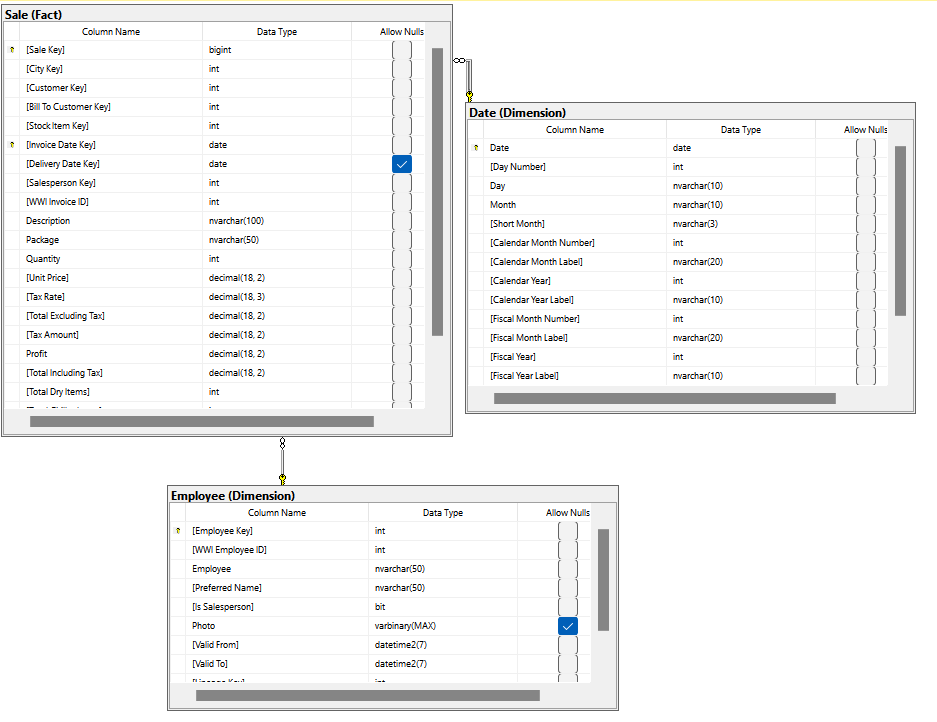

<u>Key View:</u>

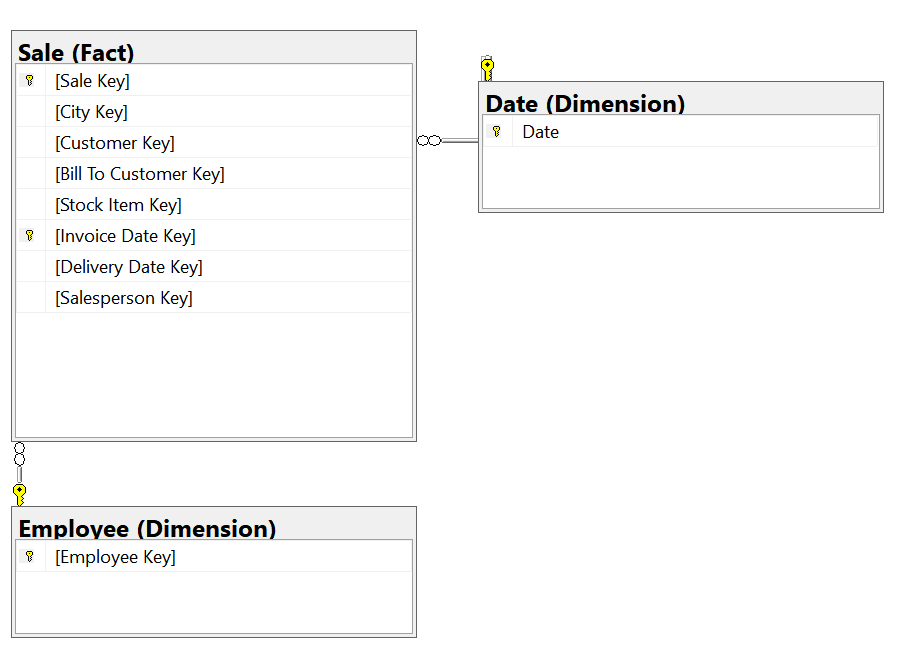

<u>Columns:</u>

| Table Names         | Columns Selected                      |
|---------------------|---------------------------------------|
| Dimension.Employee  | Is Salesperson, Preferred Name, Employee Key |
| Fact.Sale           | Quantity, Unit Price, Salesperson Key, Invoice Date Key |
| Dimension.Date      | Date                                  |

Order By:
| Table Name | Column Name       | Sort Order |
|------------|-------------------|------------|
| Fact.Sale            | TotalSalesAmount  | DESC       |


In [71]:
USE WideWorldImportersDW;
WITH SalesPersonSales AS (
    SELECT 
        de.[Is Salesperson], 
        de.[Preferred Name],
        de.[Employee Key]
    FROM 
        Dimension.Employee AS de
    WHERE 
        de.[Is Salesperson] = 1
)

SELECT TOP(10)
    sps.[Preferred Name] AS SalesPersonName,
    COUNT(fs.Quantity) AS NumberOfOrdersSold,
    SUM(fs.[Unit Price] * fs.Quantity) AS TotalSalesAmount,
    MONTH(d.Date) AS SalesMonth
FROM 
    Fact.Sale AS fs
JOIN 
    SalesPersonSales AS sps ON fs.[Salesperson Key] = sps.[Employee Key]
JOIN 
    Dimension.[Date] AS d ON fs.[Invoice Date Key] = d.[Date]
GROUP BY 
    sps.[Preferred Name],
    MONTH(d.Date)
ORDER BY 
    TotalSalesAmount DESC;
--FOR JSON PATH, ROOT('MedOutput'), INCLUDE_NULL_VALUES;



(10 rows affected)

Total execution time: 00:00:00.108

SalesPersonName,NumberOfOrdersSold,TotalSalesAmount,SalesMonth
Hudson,4863,3958518.35,4
Hudson,4792,3642458.50,5
Hudson,4414,3438557.75,3
Hudson,4533,3363519.80,1
Hudson,3838,2764623.95,2
Hudson,3581,2682408.40,7
Hudson,3431,2644393.60,6
Hudson,3422,2554556.05,12
Hudson,3305,2406978.30,8
Hudson,3105,2379202.40,11


## Q12 (Medium - AdventureWorksDW2017)

<u>Proposition:</u>

- Analyze customer spending behavior by considering their total spending on purchases, the number of orders placed, average spending per order, total order quantity, and the ratio of spending to yearly income. 
- Tables involved: FactInternetSales, DimProduct, DimProductSubcategory, DimProductCategory, FactSurveyResponse, and DimCustomer.

*Written in collaboration with ChatGPT from OpenAI to improve understanding and assist with the explanation of the query*

<u>Standard View:</u>

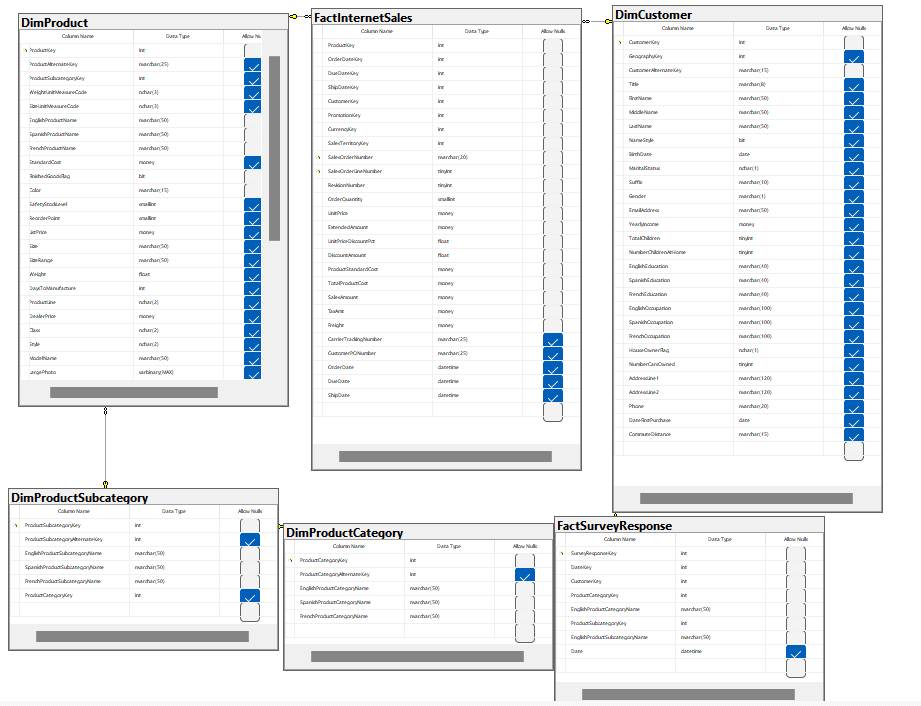

<u>Key View:</u>

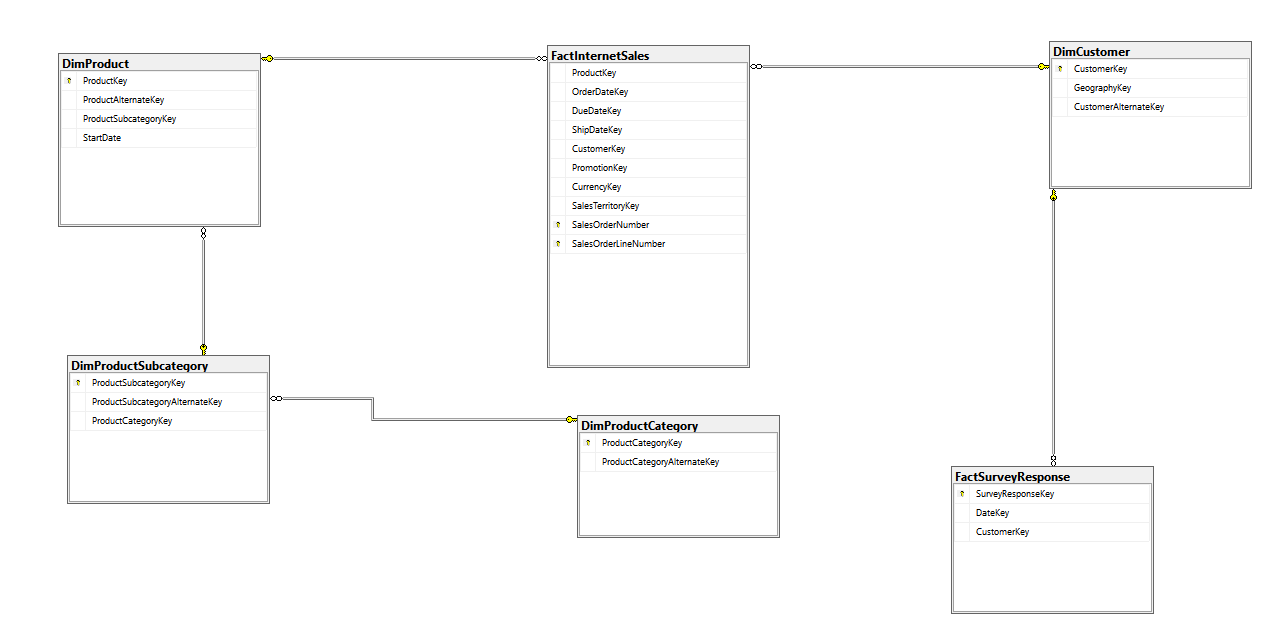

<u>Columns:</u>

| Table Names                | Columns Selected                                   |
|----------------------------|----------------------------------------------------|
| FactInternetSales          | CustomerKey, OrderDate, TotalProductCost, OrderQuantity, ProductKey |
| DimProduct                 | ProductKey                                         |
| DimProductSubcategory      | ProductSubcategoryKey                              |
| DimProductCategory         | ProductCategoryKey, EnglishProductCategoryName     |
| DimCustomer                | CustomerKey, FirstName, EnglishOccupation, YearlyIncome |
| FactSurveyResponse         | CustomerKey                                        |

Order By:
| Table Name | Column Name       | Sort Order |
|------------|-------------------|------------|
| CustomerExpenses           | TotalSpent        | DESC       |


In [65]:
USE AdventureWorksDW2017;

WITH CustomerExpenses AS (
    SELECT 
        fis.CustomerKey, 
        fis.OrderDate, 
        fis.TotalProductCost, 
        fis.OrderQuantity, 
        dpc.EnglishProductCategoryName,
        YEAR(fis.OrderDate) AS OrderYear -- Extract year from OrderDate
    FROM 
        FactInternetSales AS fis
    INNER JOIN 
        DimProduct AS dp ON dp.ProductKey = fis.ProductKey
    INNER JOIN 
        DimProductSubcategory AS dps ON dp.ProductSubcategoryKey = dps.ProductSubcategoryKey
    INNER JOIN 
        DimProductCategory AS dpc ON dps.ProductCategoryKey = dpc.ProductCategoryKey
)
SELECT TOP(5)
    dc.FirstName AS Name, 
    dc.EnglishOccupation AS Occupation, 
    dc.YearlyIncome,
    SUM(ce.TotalProductCost) AS TotalSpent, -- Total spending of each customer
    COUNT(DISTINCT ce.OrderDate) AS TotalOrders,
    AVG(ce.TotalProductCost) AS AvgSpentPerOrder, -- Average spending per order
    SUM(ce.OrderQuantity) AS TotalOrderQuantity,
    AVG(ce.OrderQuantity) AS AvgOrderQuantity,
    SUM(ce.TotalProductCost) / dc.YearlyIncome AS SpentToIncomeRatio -- Spending to income ratio
FROM 
    customerexpenses AS ce 
INNER JOIN 
    FactSurveyResponse AS fsr ON ce.CustomerKey = fsr.CustomerKey
INNER JOIN 
    DimCustomer AS dc ON fsr.CustomerKey = dc.CustomerKey
WHERE dc.EnglishOccupation IN ('Professional', 'Manual')
GROUP BY 
    dc.FirstName, 
    dc.EnglishOccupation, 
    dc.YearlyIncome
ORDER BY 
    TotalSpent DESC
--FOR JSON PATH, ROOT('MedOutput'), INCLUDE_NULL_VALUES;
; 


(5 rows affected)

Total execution time: 00:00:00.173

Name,Occupation,YearlyIncome,TotalSpent,TotalOrders,AvgSpentPerOrder,TotalOrderQuantity,AvgOrderQuantity,SpentToIncomeRatio
Meagan,Professional,70000.00,14953.738,2,1246.1448,12,1,0.2136
Lisa,Professional,100000.00,13308.1634,7,266.1632,50,1,0.133
Clarence,Professional,70000.00,12994.2554,4,590.6479,22,1,0.1856
Brendan,Professional,70000.00,11711.7297,3,487.9887,24,1,0.1673
Claudia,Manual,10000.00,11710.2276,3,650.5682,18,1,1.171


## Q13 (Medium - WideWorldImporters)

<u>Proposition:</u>

- Write a query that generates a view named RedStockItems in the Warehouse schema of the WideWorldImporters database. This view presents information about stock items that are red in color total reorder level, count of items, and the order date from the purchase orders. The query joins relevant tables, filters for items with the color 'Red' and sorts the results based on the maximum quantity on hand and the order date. 
- Tables involved: Warehouse.StockItems, Warehouse.Colors, Warehouse.StockItemHoldings, and Purchasing.PurchaseOrders.

<u>Standard View:</u>

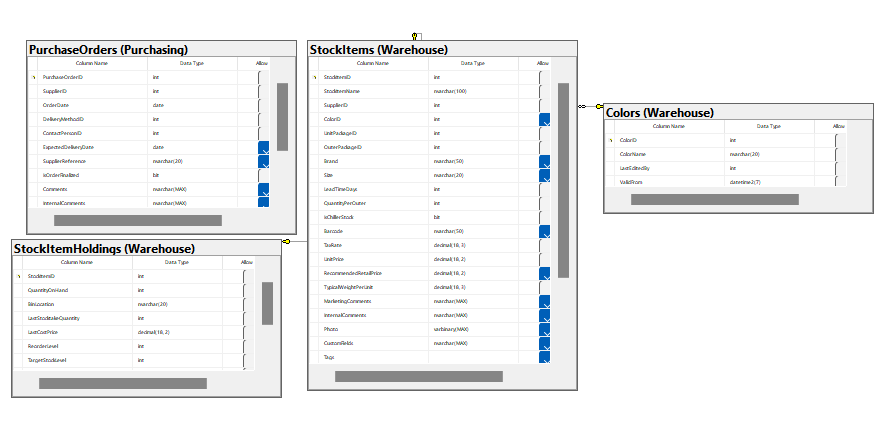

<u>Key View:</u>

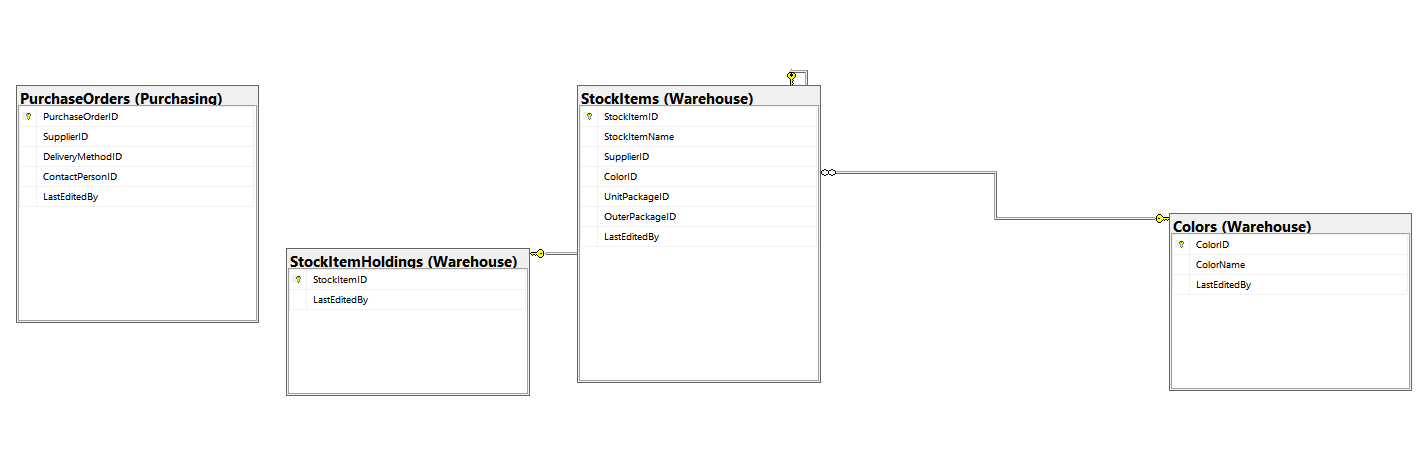

<u>Columns:</u>

| Table Names             | Columns Selected                                   |
|-------------------------|-----------------------------------------------------|
| Warehouse.StockItems    | StockItemID, StockItemName, Brand, ColorID, Size, SupplierID |
| warehouse.Colors        | ColorID, ColorName                                 |
| Warehouse.StockItemHoldings | StockItemID, BinLocation, QuantityOnHand        |
| Purchasing.PurchaseOrders | SupplierID, OrderDate                             |

Order By:
| Table Name           | Column Name           | Sort Order |
|----------------------|-----------------------|------------|
| Warehouse.StockItemHoldings | QuantityOnHand | DESC       |
| Purchasing.PurchaseOrders  | OrderDate      | DESC       |


In [52]:
USE WideWorldImporters;
DROP VIEW IF EXISTS Warehouse.RedStockItems;
GO

CREATE VIEW Warehouse.RedStockItems
AS
SELECT 
    TOP (3) -- Change the number as per your requirement
    wsi.StockItemName,
    wsi.Brand,
    wsi.Photo,
    wsi.[Size],
    wsi.SearchDetails,
    wc.ColorName,
    wsh.BinLocation,
    MAX(wsh.QuantityOnHand) AS MaxQuantityOnHand, -- Maximum quantity on hand among red stock items
    SUM(wsh.ReorderLevel) AS TotalReorderLevel, -- Total reorder level of red stock items
    COUNT(*) AS ItemCount, -- Count of red stock items
    po.OrderDate
FROM 
    Warehouse.StockItems AS wsi
INNER JOIN 
    warehouse.Colors AS wc ON wc.ColorID = wsi.ColorID
INNER JOIN 
    Warehouse.StockItemHoldings AS wsh ON wsi.StockItemID = wsh.StockItemID
INNER JOIN 
    Purchasing.PurchaseOrders AS po ON wsi.SupplierID = po.SupplierID
WHERE 
    wc.ColorName = N'Red'
GROUP BY
    wsi.StockItemName,
    wsi.Brand,
    wsi.Photo,
    wsi.[Size],
    wsi.SearchDetails,
    wc.ColorName,
    wsh.BinLocation,
    po.OrderDate
ORDER BY 
    MAX(wsh.QuantityOnHand) DESC, 
    po.OrderDate DESC; -- Order by MaxQuantityOnHand and OrderDate

GO

SELECT 
    StockItemName, 
    Brand, 
    [Size], 
    MaxQuantityOnHand, 
    TotalReorderLevel, 
    ItemCount, 
    OrderDate
FROM 
    Warehouse.RedStockItems
--FOR JSON PATH, ROOT('ComplexOutput'), INCLUDE_NULL_VALUES;


DROP VIEW IF EXISTS Warehouse.RedStockItems;


Commands completed successfully.

Commands completed successfully.

(3 rows affected)

Total execution time: 00:00:00.092

StockItemName,Brand,Size,MaxQuantityOnHand,TotalReorderLevel,ItemCount,OrderDate
RC vintage American toy coupe with remote control (Red) 1/50 scale,Northwind,1/50 scale,213248,20,1,2013-01-26
RC vintage American toy coupe with remote control (Red) 1/50 scale,Northwind,1/50 scale,213248,20,1,2013-01-15
RC vintage American toy coupe with remote control (Red) 1/50 scale,Northwind,1/50 scale,213248,20,1,2013-01-14


## Q14 (Complex - AdventureWorksDW2017)

<u>Proposition:</u>

- Return a query that analyzes sales data from AdventureWorksDW2017, categorizes customers into age groups using a custom function, and filters sales records for customers aged 31-40 residing in France.
- Tables involved: DimCustomer, DimGeography, DimProduct, DimProductSubcategory, FactInternetSales

*Written in collaboration with ChatGPT from OpenAI to improve understanding and assist with the explanation of the query*

<u>Standard View:</u>

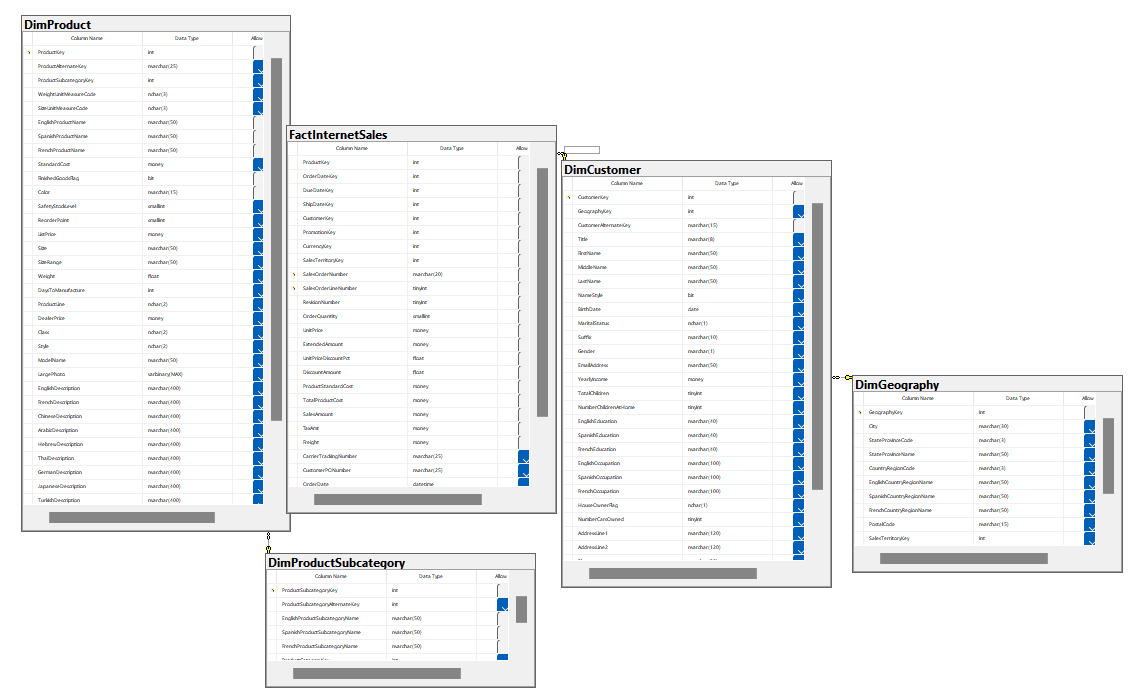

<u>Key View:</u>

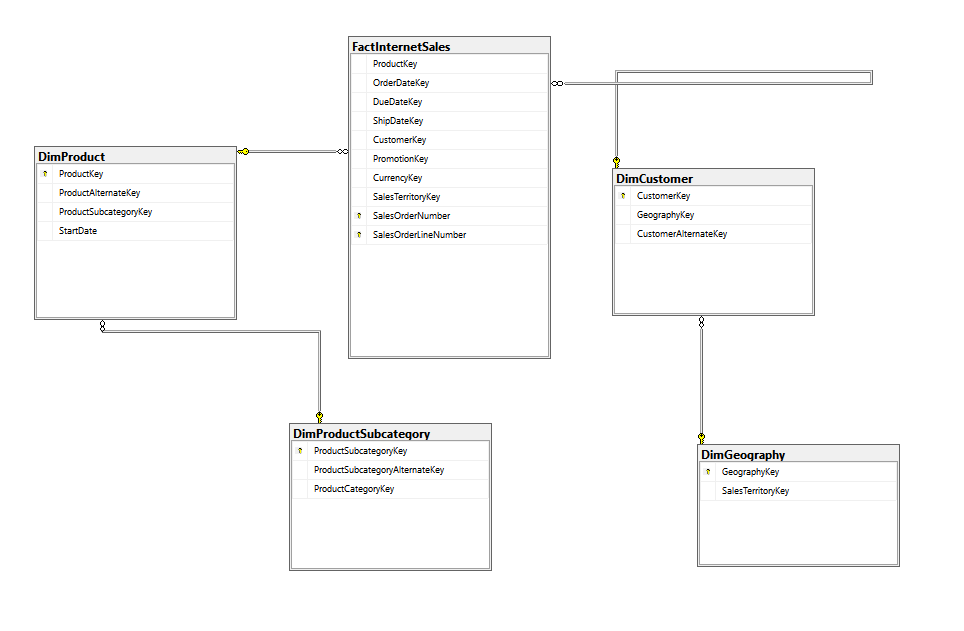

<u>Columns:</u>
| Table Names                 | Columns Selected                        |
|-----------------------------|-----------------------------------------|
| FactInternetSales           | CustomerKey, ProductKey                 |
| DimCustomer                 | CustomerKey, BirthDate, GeographyKey    |
| DimGeography                | GeographyKey, EnglishCountryRegionName  |
| DimProduct                  | ProductKey                              |
| DimProductSubcategory       | ProductSubcategoryKey, EnglishProductSubcategoryName |


In [97]:
USE AdventureWorksDW2017;
GO

-- First DROP FUNCTION statement (if any)
DROP FUNCTION IF EXISTS dbo.CalculateAgeCategory;
GO

-- Function creation
CREATE FUNCTION dbo.CalculateAgeCategory(@birthdate DATE)
RETURNS NVARCHAR(20)
AS
BEGIN
    DECLARE @result NVARCHAR(20);

    DECLARE @age INT = DATEDIFF(YEAR, @birthdate, GETDATE());

    SET @result = CASE
                        WHEN @age <= 20 THEN 'Under 20'
                        WHEN @age BETWEEN 21 AND 30 THEN '21-30'
                        WHEN @age BETWEEN 31 AND 40 THEN '31-40'
                        WHEN @age BETWEEN 41 AND 50 THEN '41-50'
                        WHEN @age BETWEEN 51 AND 60 THEN '51-60'
                        ELSE 'Over 60'
                    END;

    RETURN @result;
END;
GO

-- Main query with multiple inner joins and age category filtering
WITH SalesWithAgeCategory AS (
    SELECT  
        dc.CustomerKey,
        dg.EnglishCountryRegionName,
        dp.ProductKey, -- Select ProductKey from DimProduct
        dps.EnglishProductSubcategoryName, -- Select EnglishProductSubcategoryName from DimProductSubcategory
        dbo.CalculateAgeCategory(dc.BirthDate) AS AgeCategory -- Calculate age category using the function
    FROM 
        FactInternetSales AS fis
    INNER JOIN 
        DimCustomer AS dc ON fis.CustomerKey = dc.CustomerKey 
    INNER JOIN
        DimGeography AS dg ON dg.GeographyKey = dc.GeographyKey
    INNER JOIN 
        DimProduct AS dp ON fis.ProductKey = dp.ProductKey -- Inner join with DimProduct
    INNER JOIN 
        DimProductSubcategory AS dps ON dp.ProductSubcategoryKey = dps.ProductSubcategoryKey -- Inner join with DimProductSubcategory
)

-- Main query filtering by age category
SELECT 
    *
FROM 
    SalesWithAgeCategory
WHERE 
    AgeCategory = '31-40'
    AND EnglishCountryRegionName = N'France'; -- Filter by desired age category
--FOR JSON PATH, ROOT('ComplexOutput'), INCLUDE_NULL_VALUES;

GO

-- Second DROP FUNCTION statement (if any)
DROP FUNCTION IF EXISTS dbo.CalculateAgeCategory;
GO


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(306 rows affected)

Commands completed successfully.

Total execution time: 00:00:00.069

CustomerKey,EnglishCountryRegionName,ProductKey,EnglishProductSubcategoryName,AgeCategory
11606,France,312,Road Bikes,31-40
11592,France,313,Road Bikes,31-40
11607,France,311,Road Bikes,31-40
11611,France,312,Road Bikes,31-40
12211,France,313,Road Bikes,31-40
17973,France,334,Road Bikes,31-40
12373,France,312,Road Bikes,31-40
13662,France,371,Road Bikes,31-40
17080,France,387,Road Bikes,31-40
28547,France,360,Mountain Bikes,31-40


## Q15 (Complex - Northwinds2022TSQLV7)

<u>Proposition:</u>

- Return a query that calculates the total order price for each customer in the Northwinds database.
- Tables involved: Sales.Order, Sales.OrderDetail, Sales.Customer

*Written in collaboration with ChatGPT from OpenAI to improve understanding and assist with the explanation of the query*

<u>Standard View:</u>

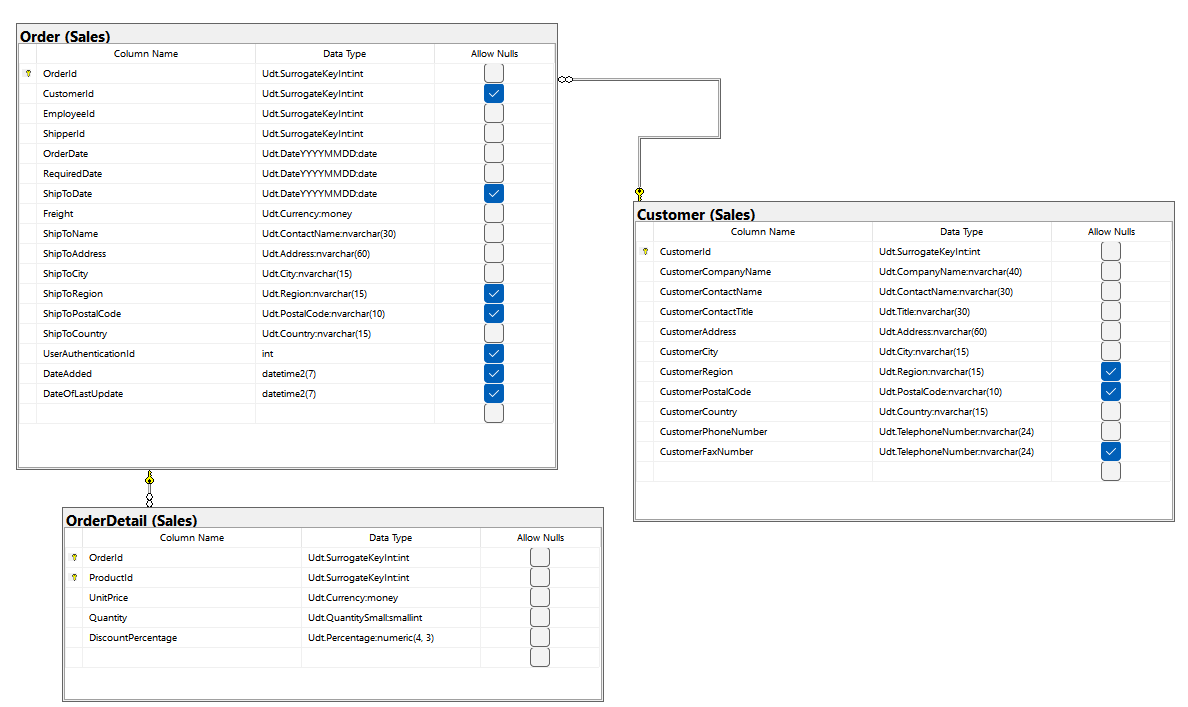

<u>Key View:</u>

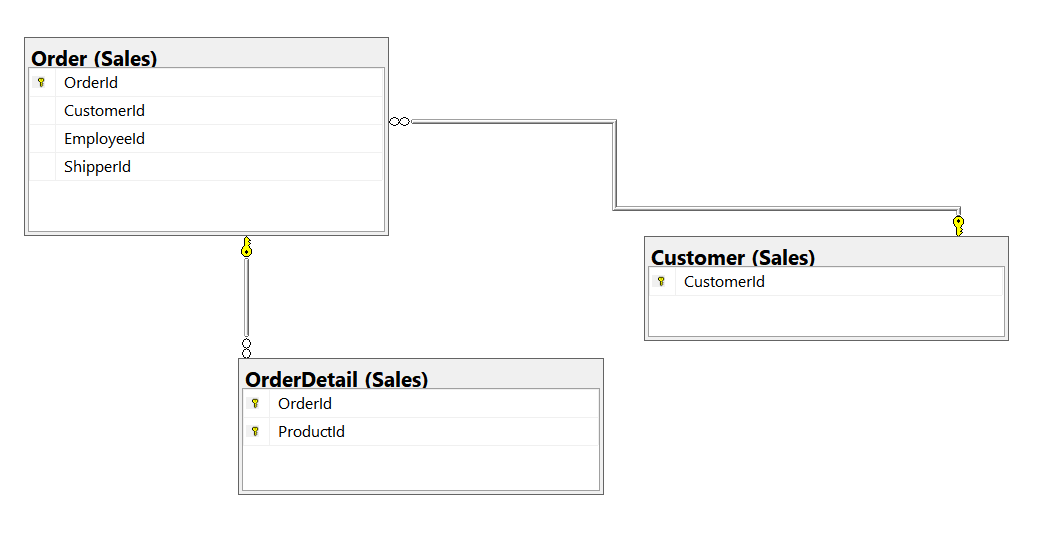

<u>Columns:</u>

| Table Names       | Columns Selected                     |
|-------------------|--------------------------------------|
| Sales.[Order]    | OrderID                              |
| Sales.[OrderDetail] | OrderID, UnitPrice, Quantity       |
| Sales.Customer   | CustomerID, CustomerCity, CustomerCompanyName |

Order By:
| Table Name | Column Name    | Sort Order |
|------------|----------------|------------|
| Sales.Customer            | TotalOrderPrice| DESC       |


In [64]:
USE Northwinds2022TSQLV7;
GO

DROP FUNCTION IF EXISTS dbo.calculateTotalOrderPrice;
GO

CREATE FUNCTION dbo.calculateTotalOrderPrice(@customerID NVARCHAR(5))
RETURNS MONEY
AS
BEGIN
    DECLARE @totalPrice MONEY;

    SELECT @totalPrice = SUM(od.UnitPrice * od.Quantity)
    FROM Sales.[Order] AS o
    INNER JOIN Sales.[OrderDetail] AS od ON o.OrderID = od.OrderID
    INNER JOIN Sales.Customer AS c ON o.CustomerId = c.CustomerID
    WHERE c.CustomerID = @customerID; -- Consider only orders from active customers

    RETURN @totalPrice;
END;
GO

WITH CustomerTotalOrderPrice AS (
    SELECT 
        CustomerID, 
        CustomerCity,
        CustomerCompanyName, 
        dbo.calculateTotalOrderPrice(CustomerID) AS TotalOrderPrice
    FROM 
        Sales.Customer
)

SELECT TOP(5)
    CustomerID, 
    CustomerCity,
    CustomerCompanyName, 
    TotalOrderPrice
FROM 
    CustomerTotalOrderPrice
ORDER BY 
    TotalOrderPrice DESC
--FOR JSON PATH, ROOT('ComplexOutput'), INCLUDE_NULL_VALUES;

GO
DROP FUNCTION IF EXISTS dbo.calculateTotalOrderPrice;
GO


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(5 rows affected)

Commands completed successfully.

Total execution time: 00:00:00.046

CustomerID,CustomerCity,CustomerCompanyName,TotalOrderPrice
63,Cunewalde,Customer IRRVL,117483.39
71,Boise,Customer LCOUJ,115673.39
20,Graz,Customer THHDP,113236.68
37,Cork,Customer FRXZL,57317.39
65,Albuquerque,Customer NYUHS,52245.90


## Q16 (Complex - AdventureWorksDW2017)

<u>Proposition:</u>

- Return a query that displays the sales amount generated by employees, categorized by fiscal year. Additionally, indicate whether the sales amount falls below or exceeds a certain threshold, for instance, $1,000,000.
- Tables involved: dbo.FactSalesQuota, dbo.DimDate, dbo.DimEmployee, dbo.DimSalesTerritory
    

<u>Standard View:</u>

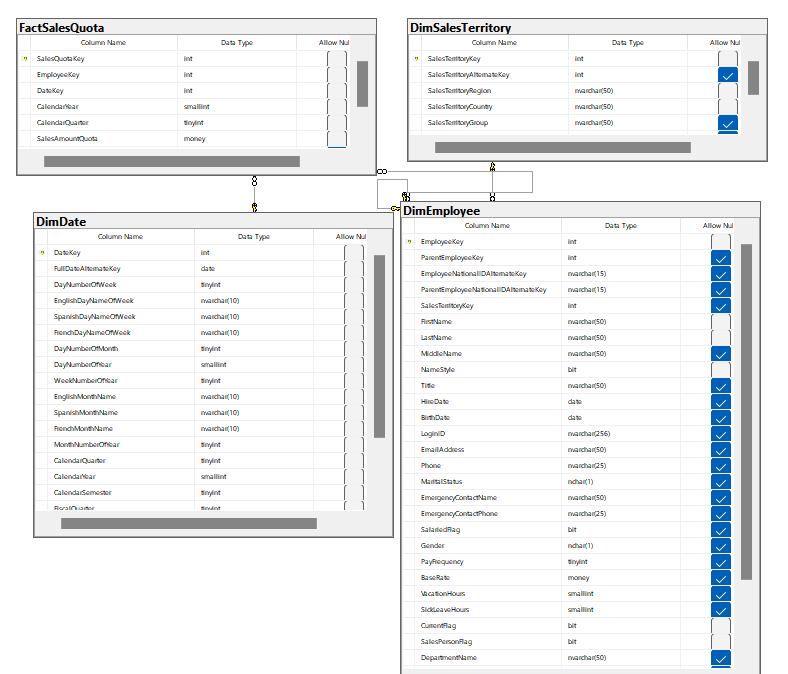

<u>Key View:</u>

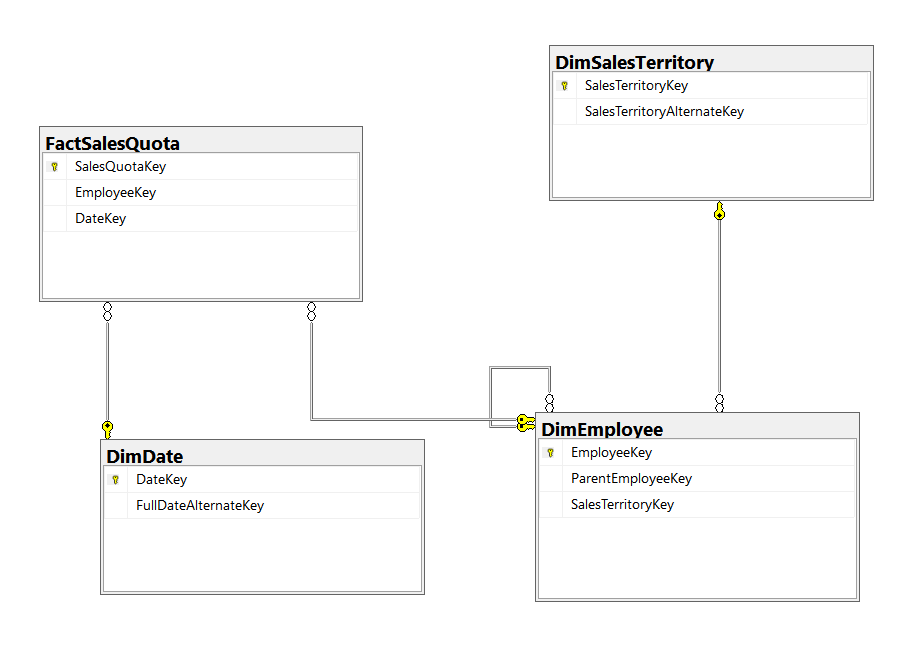

<u>Columns:</u>

| Table Names       | Columns Selected                              |
|-------------------|-----------------------------------------------|
| dbo.FactSalesQuota  | SalesAmountQuota, DateKey, EmployeeKey      |
| dbo.DimDate         | DateKey, FiscalQuarter                       |
| dbo.DimEmployee     | EmployeeKey, FirstName, Gender, SalesTerritoryKey |
| dbo.DimSalesTerritory | SalesTerritoryKey, SalesTerritoryCountry    |


Order By:
| Table Name  | Column Name | Sort Order |
|-------------|-------------|------------|
|             | TotalSales  | DESC       |



In [61]:
USE AdventureWorksDW2017;
GO

DROP FUNCTION IF EXISTS dbo.EmployeeSalesQuota;
GO

CREATE FUNCTION dbo.EmployeeSalesQuota(@SalesAmount AS MONEY)
RETURNS NVARCHAR(50)
AS
BEGIN
    DECLARE @Category NVARCHAR(50);

    SET @Category = 
        CASE
            WHEN @SalesAmount < 1000000 THEN 'Less than 1M'
            WHEN @SalesAmount >= 1000000 THEN 'Higher than 1M'
            ELSE 'unknown'
        END;

    RETURN @Category;
END;
GO

WITH TopEmployee AS (
    SELECT 
        de.EmployeeKey,
        de.FirstName,
        de.Gender,
        dst.SalesTerritoryCountry,
        SUM(fsq.SalesAmountQuota) as totalsales, 
        dbo.EmployeeSalesQuota(SUM(fsq.SalesAmountQuota)) as salescategory,
        CASE 
            WHEN dd.FiscalQuarter = 3 THEN 'Q3'
            WHEN dd.FiscalQuarter = 4 THEN 'Q4'
            WHEN dd.FiscalQuarter = 1 THEN 'Q1'
            WHEN dd.FiscalQuarter = 2 THEN 'Q2'
            ELSE 'unknown'
        END AS FiscalQuarters
    FROM 
        dbo.FactSalesQuota as fsq
    INNER JOIN 
        dbo.DimDate as dd ON fsq.DateKey = dd.DateKey
    INNER JOIN 
        dbo.DimEmployee as de ON fsq.EmployeeKey = de.EmployeeKey
    INNER JOIN 
        dbo.DimSalesTerritory as dst ON de.SalesTerritoryKey = dst.SalesTerritoryKey
    GROUP BY 
        de.EmployeeKey, de.FirstName, de.Gender, dst.SalesTerritoryCountry, dd.FiscalQuarter
)

SELECT TOP (1)
    FirstName AS Name, 
    Gender, 
    SalesTerritoryCountry AS Country, 
    TotalSales, 
    SalesCategory, 
    FiscalQuarters
FROM 
    TopEmployee
WHERE 
    SalesTerritoryCountry <> 'NA'
    AND SalesTerritoryCountry = N'United States'
ORDER BY 
    TotalSales DESC
    
FOR JSON PATH, ROOT('ComplexOutput'), INCLUDE_NULL_VALUES;

GO

DROP FUNCTION IF EXISTS dbo.EmployeeSalesQuota;
GO


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(1 row affected)

Commands completed successfully.

Total execution time: 00:00:00.234

JSON_F52E2B61-18A1-11d1-B105-00805F49916B
"{""ComplexOutput"":[{""Name"":""Jillian"",""Gender"":""F"",""Country"":""United States"",""TotalSales"":4114000.0000,""SalesCategory"":""Higher than 1M"",""FiscalQuarters"":""Q1""}]}"


## Q17 (Complex - WorldWideImpostersDW)

<u>Proposition:</u>

- <mark>Return</mark> <mark>a</mark> <mark>query</mark> <mark>where</mark> s<mark>a</mark>les d<mark>a</mark>t<mark>a</mark> for <mark>a</mark> specific item on July 22, 2015, is <mark>a</mark>n<mark>a</mark>lyzed, considering profit within the r<mark>a</mark>nge of $2000 to $8000. The <mark>query</mark> c<mark>a</mark>tegorizes profits <mark>a</mark>s "High Profit," "Medium Profit," or "Low Profit" using <mark>a</mark> custom sc<mark>a</mark>l<mark>a</mark>r function. 
- T<mark>a</mark>bles involved: Dimension.City, Fact.Order, Dimension.StockItem, Fact.Sale, and Dimension.Date.


<u>Key View:</u>

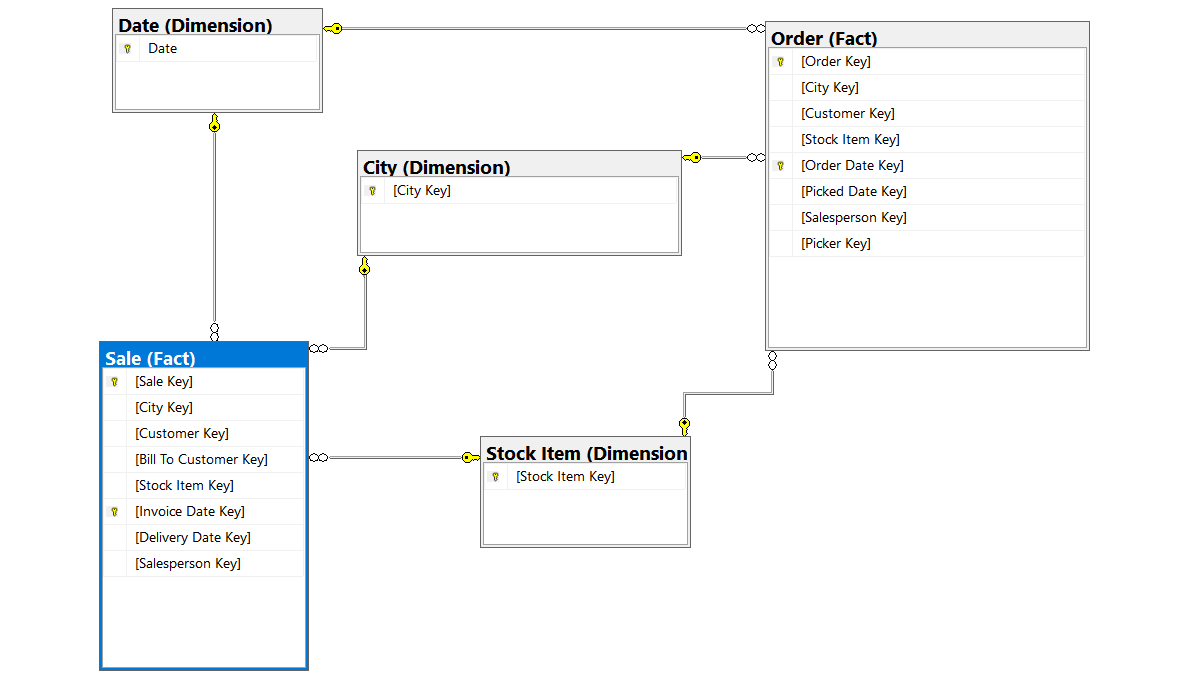

<u>Standard View:</u>

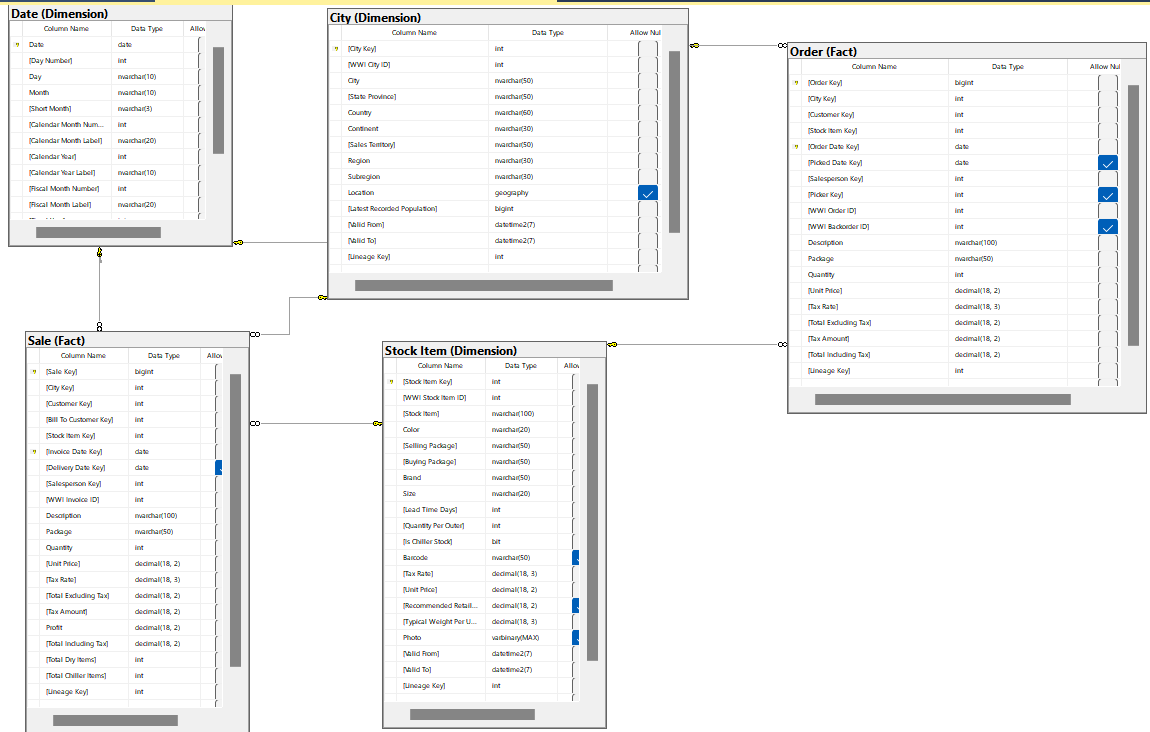

<u>Columns:</u>
| Table Names           | Columns Selected                                             |
|-----------------------|--------------------------------------------------------------|
| Dimension.City        | City Key, City, State Province                               |
| Fact.Order            | City Key, Stock Item Key                                      |
| Dimension.Stock Item  | Stock Item Key, Stock Item                                   |
| Fact.Sale             | Stock Item Key, Profit, Unit Price, Invoice Date Key          |
| Dimension.Date        | Date, Invoice Date Key                                        |

Order By:
| Table Name | Column Name       | Sort Order |
|------------|-------------------|------------|
|   Fact.Sale         | Profit            | DESC       |



In [56]:
USE WideWorldImportersDW;
GO
-- Define a custom scalar function to categorize profit
DROP FUNCTION IF EXISTS dbo.CategorizeProfit;
GO
CREATE FUNCTION dbo.CategorizeProfit(@Profit AS DECIMAL(10,2))
RETURNS NVARCHAR(50)
AS
BEGIN
    DECLARE @Category NVARCHAR(50);
    
    SET @Category = 
        CASE
            WHEN @Profit >= 7000 THEN 'High Profit'
            WHEN @Profit >= 5000 AND @Profit < 7000 THEN 'Medium Profit'
            ELSE 'Low Profit'
        END;
    
    RETURN @Category;
END;
GO

-- Complex query joining multiple tables
WITH ItemPrices AS (
    SELECT 
        dc.City,
        dc.[State Province],
        fs.Profit,
        si.[Stock Item],
        fs.[Unit Price],
        dd.[Date]
    FROM 
        Dimension.City AS dc
    INNER JOIN 
        Fact.[Order] AS fo ON dc.[City Key] = fo.[City Key]
    INNER JOIN
        Dimension.[Stock Item] AS si ON fo.[Stock Item Key] = si.[Stock Item Key]
    INNER JOIN
        Fact.[Sale] AS fs ON si.[Stock Item Key] = fs.[Stock Item Key]
    INNER JOIN
        Dimension.[Date] AS dd ON fs.[Invoice Date Key] = dd.[Date]

)
SELECT TOP (10)
    City,
    [State Province],
    [Stock Item],
    Profit,
    [Unit Price],
    [Date],
    dbo.CategorizeProfit(Profit) AS ProfitCategory
FROM 
    ItemPrices
WHERE 
    YEAR([Date]) = '2015'
    AND Month([Date]) = '07'
    AND DAY([Date]) = '22'
    AND Profit BETWEEN 2000 AND 8000
    AND [State Province] IN ('New York', 'Texas') -- Filter for specified states

ORDER BY
    [Profit] DESC
FOR JSON PATH, ROOT('ComplexOutput'), INCLUDE_NULL_VALUES;

-- Cleanup
DROP FUNCTION IF EXISTS dbo.CategorizeProfit;
GO


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(10 rows affected)

Total execution time: 00:00:00.062

City,State Province,Stock Item,Profit,Unit Price,Date,ProfitCategory
Jones Creek,Texas,20 mm Double sided bubble wrap 50m,7360.00,108.00,2015-07-22,High Profit
Pharr,Texas,20 mm Double sided bubble wrap 50m,7360.00,108.00,2015-07-22,High Profit
Esopus,New York,20 mm Double sided bubble wrap 50m,7360.00,108.00,2015-07-22,High Profit
The Colony,Texas,20 mm Double sided bubble wrap 50m,7360.00,108.00,2015-07-22,High Profit
Flowella,Texas,20 mm Double sided bubble wrap 50m,7360.00,108.00,2015-07-22,High Profit
Haltom City,Texas,20 mm Double sided bubble wrap 50m,7360.00,108.00,2015-07-22,High Profit
Old River-Winfree,Texas,20 mm Double sided bubble wrap 50m,7360.00,108.00,2015-07-22,High Profit
Greig,New York,20 mm Double sided bubble wrap 50m,7360.00,108.00,2015-07-22,High Profit
El Refugio,Texas,20 mm Double sided bubble wrap 50m,7360.00,108.00,2015-07-22,High Profit
Del Valle,Texas,20 mm Double sided bubble wrap 50m,7360.00,108.00,2015-07-22,High Profit


## Q18 (Complex - Northwinds2022TSQLV7)

<u>Proposition:</u>

- Define a table-valued function dbo.GetEmployeeOrders that takes an employee ID (@empid) as input and returns details of the top 3 orders sold by that employee. 
- Tables involved: Sales.OrderDetails, Sales.\[Order\], HumanResources.Employee, Production.Product, Production.Category

<u>Standard View:</u>

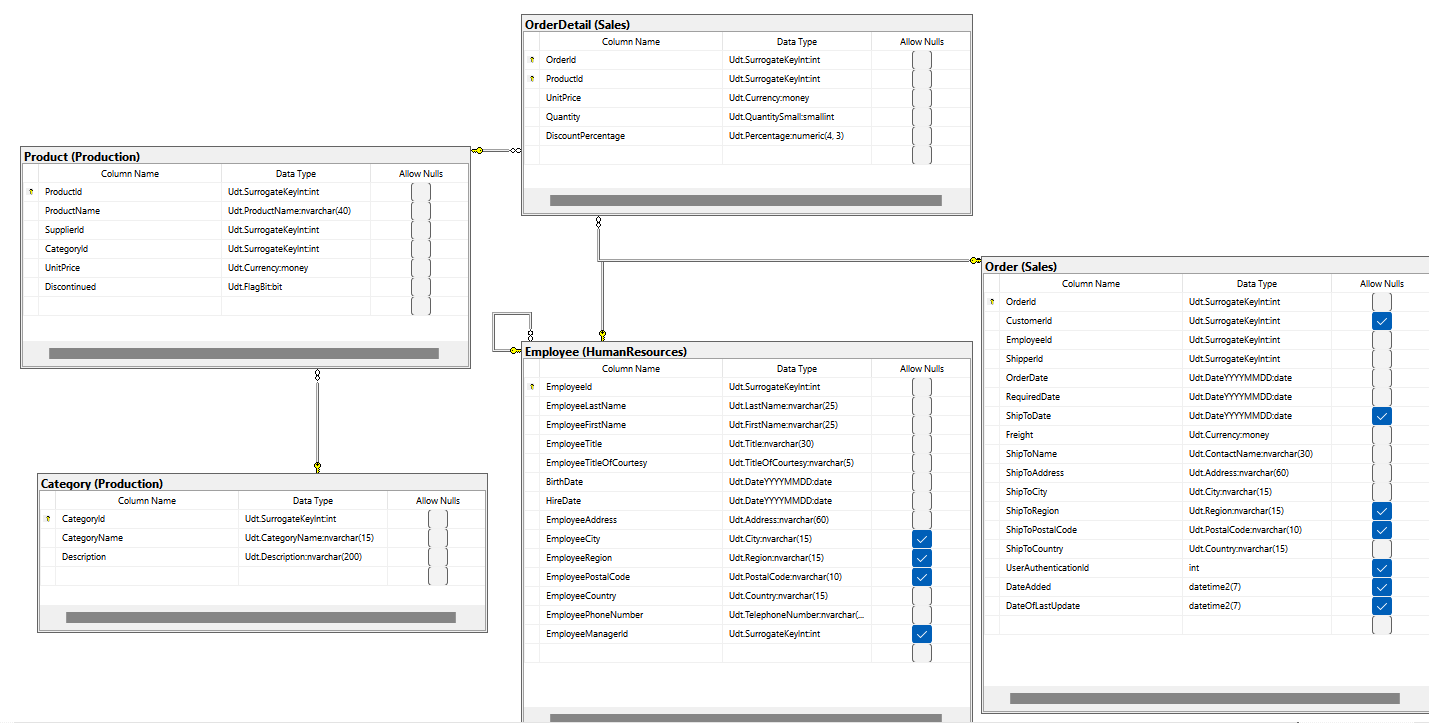

<u>Key View:</u>

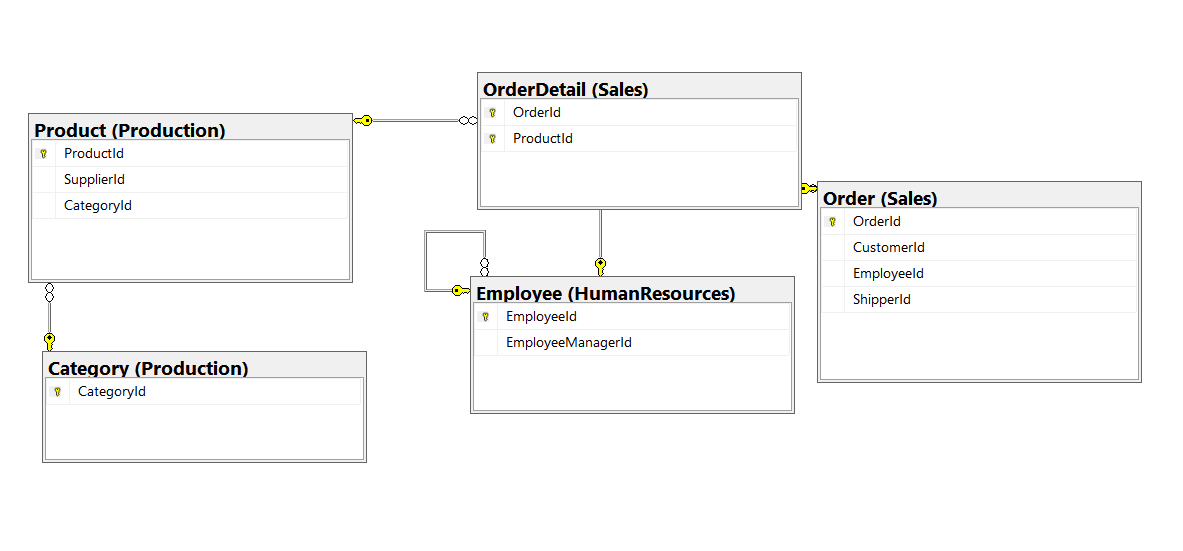

<u>Columns:</u>
| Table Names             | Columns Selected                                   |
|-------------------------|-----------------------------------------------------|
| Sales.OrderDetail       | OrderID, ProductID, Quantity, UnitPrice            |
| Sales.[Order]           | OrderID, OrderDate, EmployeeID                      |
| HumanResources.Employee | EmployeeID, EmployeeFirstName, EmployeeTitle        |
| Production.Product      | ProductID                                            |
| Production.Category     | CategoryID, CategoryName                            |


In [53]:
USE Northwinds2022TSQLV7;
GO

DROP FUNCTION IF EXISTS dbo.GetEmployeeOrders;
GO

CREATE FUNCTION dbo.GetEmployeeOrders(@empid INT)
RETURNS TABLE
AS
RETURN 
(
    SELECT 
        od.OrderID,
        o.OrderDate,
        SUM(od.Quantity * od.UnitPrice) AS TotalPrice,
        od.ProductID,
        od.Quantity,
        od.UnitPrice,
        o.EmployeeId
    FROM 
        Sales.OrderDetail od
    INNER JOIN 
        Sales.[Order] o ON od.OrderID = o.OrderID
    WHERE 
        o.EmployeeID = @empid
    GROUP BY
        od.OrderID,
        o.OrderDate,
        od.ProductID,
        od.Quantity,
        od.UnitPrice,
        o.EmployeeId
);
GO

SELECT TOP (5)
    e.OrderID, 
    e.TotalPrice,
    e.OrderDate, 
    hr.EmployeeFirstName, 
    hr.EmployeeTitle, 
    c.CategoryName
FROM 
    dbo.GetEmployeeOrders(3) e
INNER JOIN 
    HumanResources.Employee hr ON e.EmployeeId = hr.EmployeeID
INNER JOIN 
    Production.Product p ON e.ProductID = p.ProductID
INNER JOIN 
    Production.Category c ON p.CategoryID = c.CategoryID
WHERE
    YEAR(OrderDate) = '2015'
ORDER BY 
    TotalPrice DESC
FOR JSON PATH, ROOT('ComplexOutput'), INCLUDE_NULL_VALUES;

GO

DROP FUNCTION IF EXISTS dbo.GetEmployeeOrders;


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(5 rows affected)

Commands completed successfully.

Total execution time: 00:00:00.041

OrderID,TotalPrice,OrderDate,EmployeeFirstName,EmployeeTitle,CategoryName
10540,7905.00,2015-05-19,Judy,Sales Manager,Beverages
10479,6324.00,2015-03-19,Judy,Sales Manager,Beverages
10514,3159.00,2015-04-22,Judy,Sales Manager,Confections
10514,2660.00,2015-04-22,Judy,Sales Manager,Grains/Cereals
10479,2640.00,2015-03-19,Judy,Sales Manager,Dairy Products


## Q19 (Complex - AdventureWorks2017)

<u>Proposition:</u>

- Write a query that retrieves the product name, its special discount percentage, rating, start and end dates of the discount, and its standard price for comparison. Arrange the results from greatest to lowest discount percentage. 
- Tables involved: Production.ProductReview, Production.Product, Sales.SpecialOfferProduct, Sales.SpecialOffer, and Purchasing.ProductVendor

*Written in collaboration with ChatGPT from OpenAI to improve understanding and assist with the explanation of the query*
        

Key View

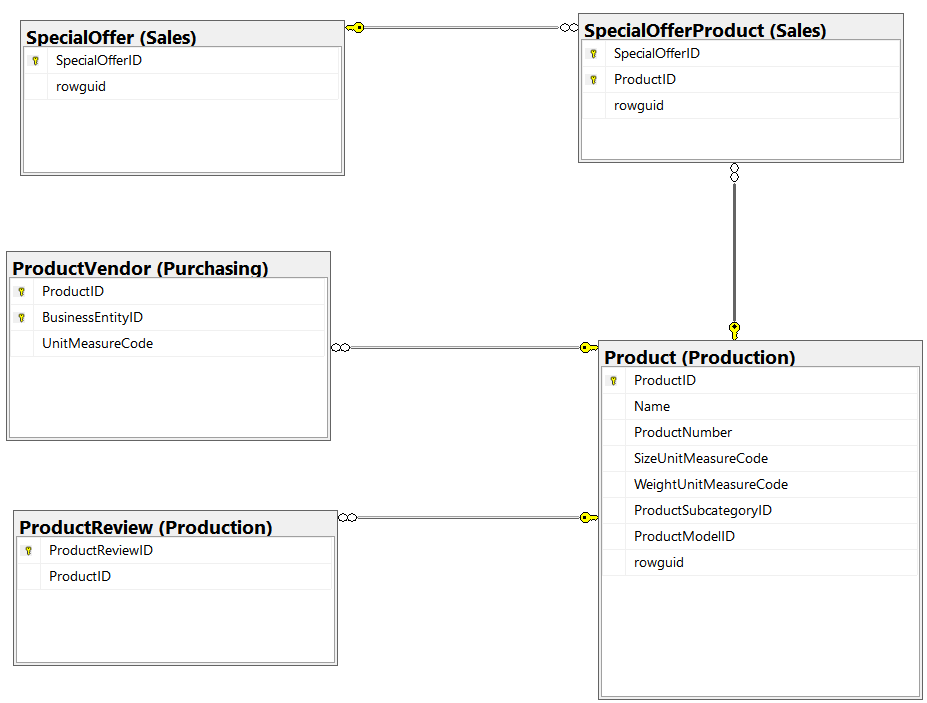

Standard View

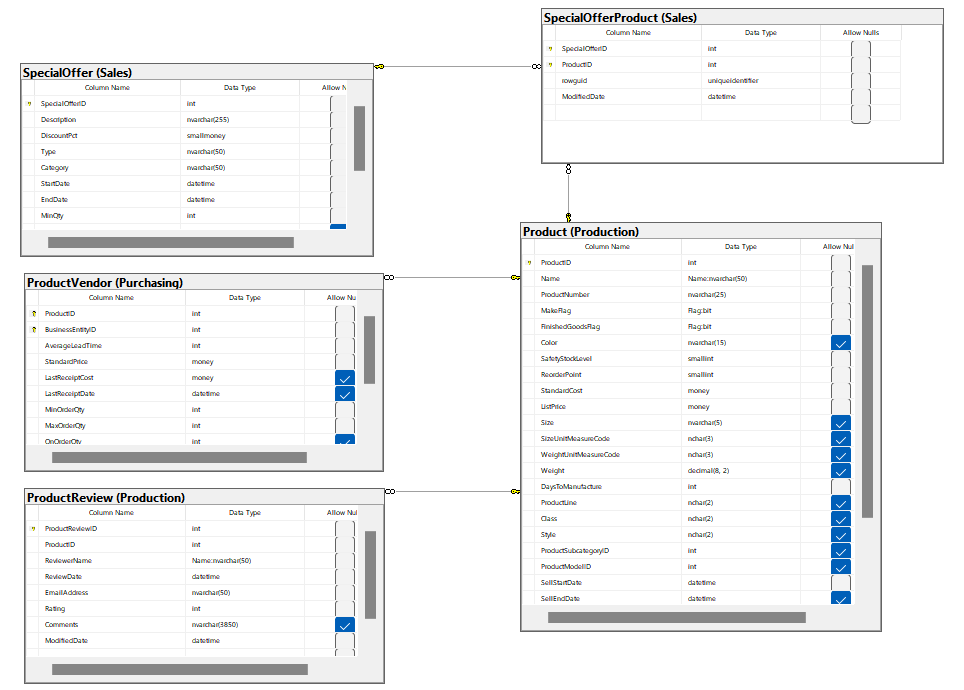

Columns

| Table Names              | Columns Selected                                           |
|--------------------------|-------------------------------------------------------------|
| Production.ProductReview | Rating, ProductID                                          |
| Production.Product       | ProductID, Name                                           |
| Sales.SpecialOfferProduct| ProductID, SpecialOfferID                                  |
| Sales.SpecialOffer       | SpecialOfferID, DiscountPct, StartDate, EndDate             |
| Purchasing.ProductVendor | ProductID, StandardPrice                                   |


In [16]:
USE AdventureWorks2017;
GO

-- Define a custom scalar function to categorize discount percentage
DROP FUNCTION IF EXISTS dbo.CategorizeDiscountPercentage;
GO
CREATE FUNCTION dbo.CategorizeDiscountPercentage(@DiscountPct AS DECIMAL(10,2))
RETURNS NVARCHAR(50)
AS
BEGIN
    DECLARE @Category NVARCHAR(50);
    
    SET @Category = 
        CASE
            WHEN @DiscountPct <= .20 THEN 'Low Discount'
            WHEN @DiscountPct > .20 AND @DiscountPct <= .40 THEN 'Medium Discount'
            ELSE 'High Discount'
        END;
    
    RETURN @Category;
END;
GO

WITH StoreProductDiscounts AS (
    SELECT 
        s.Rating,
        p.Name AS ProductName,
        so.DiscountPct,
        so.StartDate,
        so.EndDate,
        st.StandardPrice,
        dbo.CategorizeDiscountPercentage(so.DiscountPct) AS DiscountCategory
    FROM 
        Production.ProductReview s
    INNER JOIN 
        Production.Product p ON s.ProductID = p.ProductID
    INNER JOIN 
        Sales.SpecialOfferProduct sop ON p.ProductID = sop.ProductID
    INNER JOIN 
        Sales.SpecialOffer so ON sop.SpecialOfferID = so.SpecialOfferID
    INNER JOIN 
        Purchasing.ProductVendor st ON s.ProductID = st.ProductID
),
MaxDiscounts AS (
    SELECT 
        Rating,
        ProductName,
        MAX(DiscountPct) AS MaxDiscount
    FROM 
        StoreProductDiscounts
    GROUP BY 
        Rating, ProductName
)
SELECT 
    spd.Rating,
    spd.ProductName,
    spd.DiscountPct,
    spd.StartDate,
    spd.EndDate,
    spd.StandardPrice,
    spd.DiscountCategory
FROM 
    StoreProductDiscounts spd
INNER JOIN 
    MaxDiscounts  AS md ON spd.Rating = md.Rating
                    AND spd.ProductName = md.ProductName 
                    AND spd.DiscountPct = md.MaxDiscount
WHERE 
    spd.DiscountPct = md.MaxDiscount
ORDER BY 
    spd.DiscountPct DESC
--FOR JSON PATH, ROOT('ComplexOutput'), INCLUDE_NULL_VALUES;

-- Cleanup
DROP FUNCTION IF EXISTS dbo.CategorizeDiscountPercentage;
GO


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(3 rows affected)

Total execution time: 00:00:00.134

Rating,ProductName,DiscountPct,StartDate,EndDate,StandardPrice,DiscountCategory
2,HL Mountain Pedal,0.50,2013-07-14 00:00:00.000,2013-08-14 00:00:00.000,59.99,High Discount
4,HL Mountain Pedal,0.50,2013-07-14 00:00:00.000,2013-08-14 00:00:00.000,59.99,High Discount
5,"Mountain Bike Socks, M",0.10,2011-05-31 00:00:00.000,2014-05-30 00:00:00.000,3.10,Low Discount


## #20 (Complex - Northwinds2022TSQLV7)

<u>Proposition:</u>

- Write a query to retrieve the name of the most bought product, along with its supplier's country and the total quantity purchased for each of the products in 2016, including their order dates. 
- Tables involved: Production.Product, Production.Supplier,Sales.OrderDetail, Sales.\[Order\]

<u>Standard View:</u>

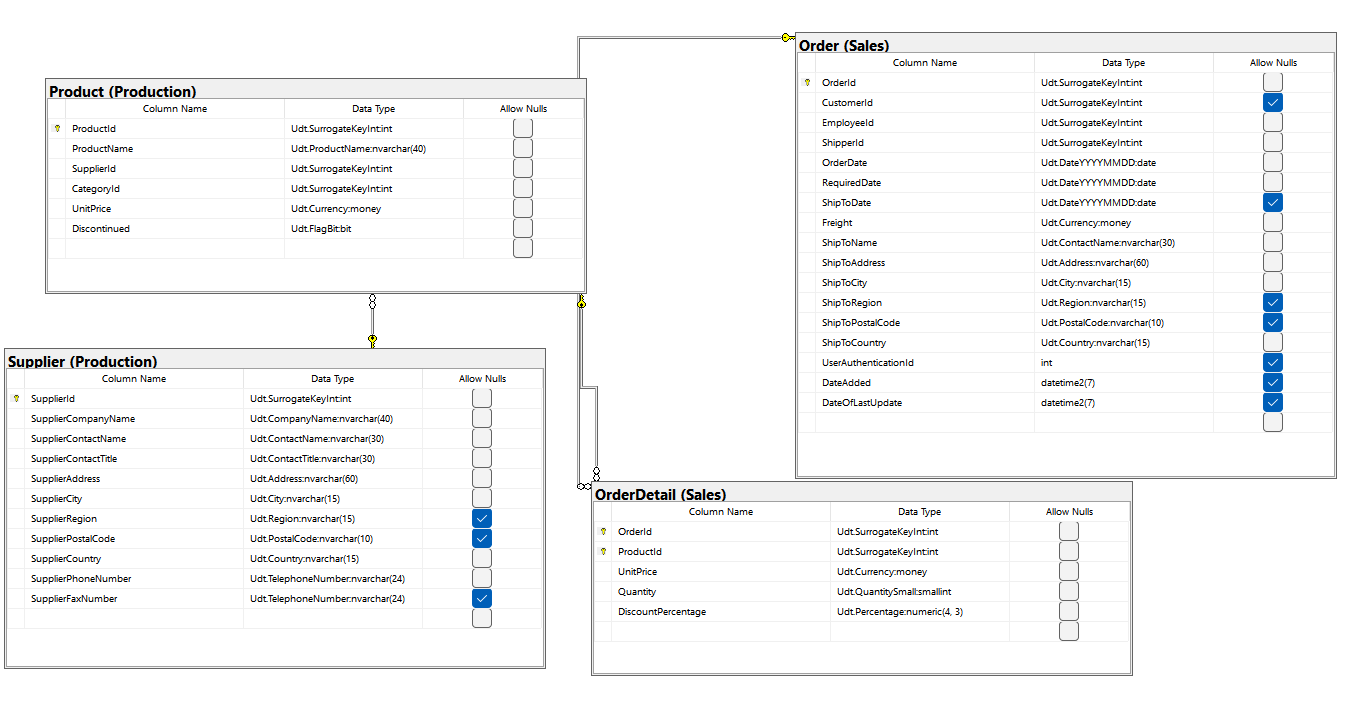

<u>Key View:</u>

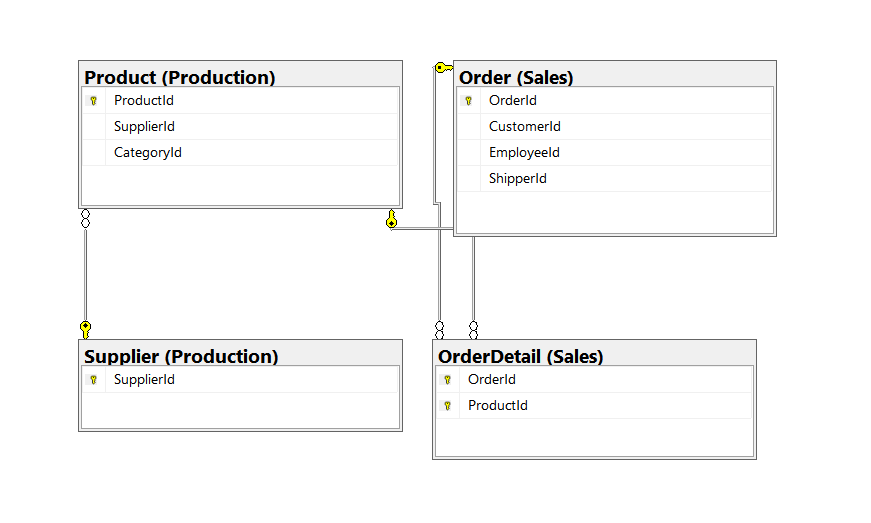

<u>Columns:</u>

| Table Name | Column Name |
| --- | --- |
| Production.Product | ProductId<br><br> |
|  | ProductName |
| Production.Supplier | SupplierCountry |
| Sales.OrderDetail | Quantity |
|  | OrderId |
| Sales.\[Order\] | OrderId |
|  | OrderDate |

In [78]:
USE Northwinds2022TSQLV7;
GO

-- Define a custom scalar function to categorize total quantity
DROP FUNCTION IF EXISTS dbo.CategorizeTotalQuantity;
GO
CREATE FUNCTION dbo.CategorizeTotalQuantity(@Quantity AS INT)
RETURNS NVARCHAR(50)
AS
BEGIN
    DECLARE @Category NVARCHAR(50);
    
    SET @Category = 
        CASE
            WHEN @Quantity < 100 THEN 'Low Quantity'
            WHEN @Quantity >= 100 AND @Quantity < 500 THEN 'Medium Quantity'
            ELSE 'High Quantity'
        END;
    
    RETURN @Category;
END;
GO

WITH ProductSupplierSales AS (
    SELECT 
        p.ProductId,
        p.ProductName,
        s.SupplierCountry,
        SUM(od.Quantity) AS TotalQuantity,
        dbo.CategorizeTotalQuantity(SUM(od.Quantity)) AS QuantityCategory
    FROM 
        Production.Product p
    INNER JOIN 
        Production.Supplier s ON p.SupplierId = s.SupplierId
    INNER JOIN 
        Sales.OrderDetail od ON p.ProductId = od.ProductId
    INNER JOIN 
        Sales.[Order] o ON od.OrderId = o.OrderId
    WHERE 
        YEAR(o.OrderDate) = 2016
    GROUP BY 
        p.ProductId, p.ProductName, s.SupplierCountry
)
SELECT 
    ProductName,
    SupplierCountry,
    TotalQuantity,
    QuantityCategory
FROM 
    ProductSupplierSales
ORDER BY 
    TotalQuantity DESC;
--FOR JSON PATH, ROOT('Complex Top#1'), INCLUDE_NULL_VALUES;

-- Cleanup
DROP FUNCTION IF EXISTS dbo.CategorizeTotalQuantity;
GO


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

(76 rows affected)

Total execution time: 00:00:00.031

ProductName,SupplierCountry,TotalQuantity,QuantityCategory
Product POXFU,Japan,659,High Quantity
Product QOGNU,Brazil,546,High Quantity
Product WHBYK,France,542,High Quantity
Product UKXRI,France,513,High Quantity
Product HMLNI,USA,414,Medium Quantity
Product BWRLG,Germany,405,Medium Quantity
Product HHYDP,UK,399,Medium Quantity
Product RECZE,UK,396,Medium Quantity
Product JYGFE,Finland,388,Medium Quantity
Product WUXYK,Canada,351,Medium Quantity
